# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


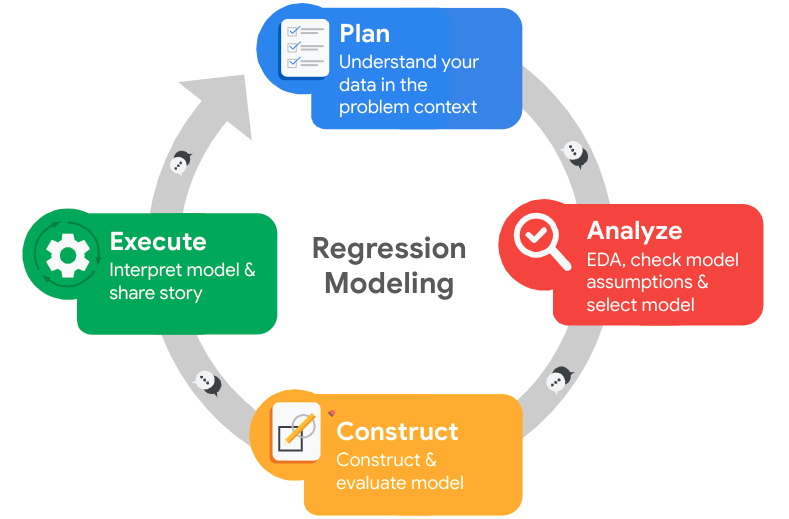

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [42]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump, load

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, silhouette_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [43]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

df.head(10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [44]:
# Gather basic information about the data
### YOUR CODE HERE ###

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [45]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###

df.describe().round(2)


satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  Work_accident      left  \
count              14999.00            14999.00       14999.00  14999.00   
mean                 201.05                3.50           0.14      0.24   
std                   49.94                1.46           0.35      0.43   
min                   96.00                2.00           0.00      0.00   
25%                  156.00                3.00           0.00      0.00   
50%                  200.00                3.00           0.00      0.00   
75%                  245.00                4.00           0.00      0.00   
max                  310.00               10.00           1.00      1.00   

       promotion_last_5years  
count               14999.00  
mean                    0.02  
std                     0.14  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [46]:
# Display all column names
### YOUR CODE HERE ###

df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [47]:
# Rename columns as needed
### YOUR CODE HERE ###

df.columns = df.columns.str.title()

df = df.rename(columns= {
    'Promotion_Last_5Years' : 'Promotion_Last_5_Years',
    'Average_Montly_Hours' : 'Average_Monthly_Hours'
})


# Display all column names after the update
### YOUR CODE HERE ###

df.head()


Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years Department  \
0                   3              0     1                       0      sales   
1                   6              0     1                       0      sales   
2                   4              0     1                       0      sales   
3                   5              0     1                       0      sales   
4                   3              0     1                       0      sales   

   Salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Check missing values

Check for any missing values in the data.

In [48]:
# Check for missing values
### YOUR CODE HERE ###

df.isnull().sum()


Satisfaction_Level        0
Last_Evaluation           0
Number_Project            0
Average_Monthly_Hours     0
Time_Spend_Company        0
Work_Accident             0
Left                      0
Promotion_Last_5_Years    0
Department                0
Salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [49]:
# Check for duplicates
### YOUR CODE HERE ###

df.duplicated().sum()


np.int64(3008)

In [50]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

df[df.duplicated()]


Satisfaction_Level  Last_Evaluation  Number_Project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       Average_Monthly_Hours  Time_Spend_Company  Work_Accident  Left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                     127                   3              0     1   
1368                     132                   3              0     1   
1461                     142                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       Promotion_Last_5_Years  Department  Salary  
396                         0       sales     low  
866                         0  accounting     low  
1317                        0       sales  medium  
1368                        0       RandD     low  
1461                        0       sales     low  
...                       ...         ...     ...  
14994                       0     support     low  
14995                       0     support     low  
14996                       0     support     low  
14997                       0     support     low  
14998                       0     support     low  

[3008 rows x 10 columns]

In [51]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df = df.drop_duplicates(keep= 'first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

df.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years Department  \
0                   3              0     1                       0      sales   
1                   6              0     1                       0      sales   
2                   4              0     1                       0      sales   
3                   5              0     1                       0      sales   
4                   3              0     1                       0      sales   

   Salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [52]:
df.shape

(11991, 10)

In [53]:
df.duplicated().sum()

np.int64(0)

### Check outliers

Check for outliers in the data.

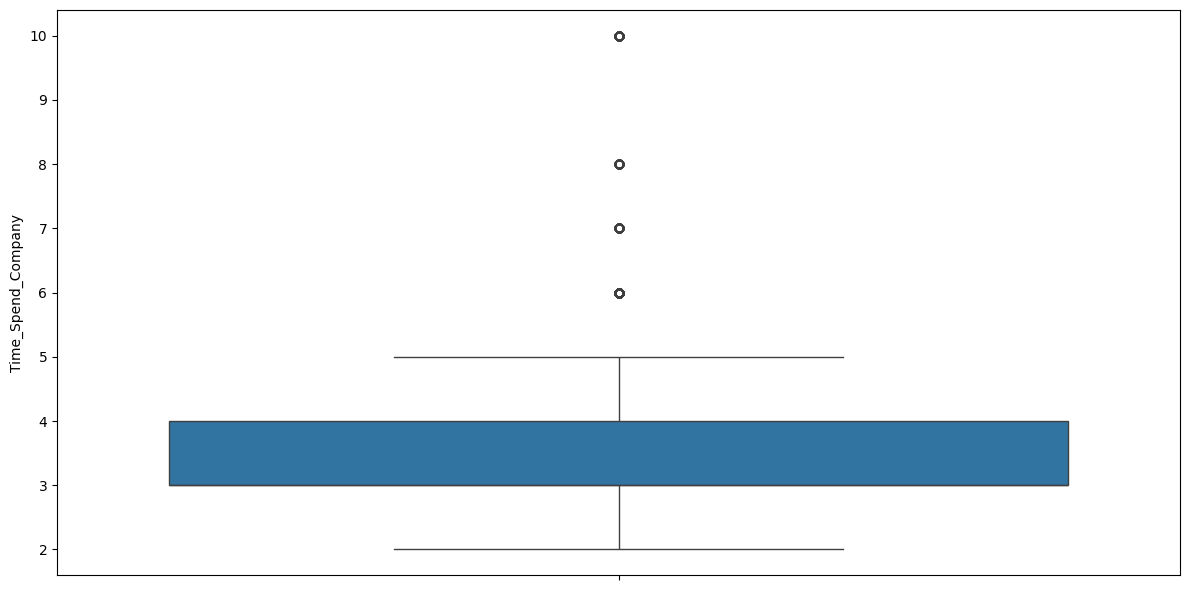

In [54]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(12,6))

sns.boxplot(data = df,
            y = 'Time_Spend_Company')

plt.tight_layout()

In [55]:
df['Time_Spend_Company'].value_counts()

Time_Spend_Company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [56]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

q1 = df['Time_Spend_Company'].quantile(0.25)
q3 = df['Time_Spend_Company'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outlier = df[(df['Time_Spend_Company'] > upper) | (df['Time_Spend_Company'] < lower)]

print(f'Jumlah Outlier : {len(outlier)}')


Jumlah Outlier : 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [57]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

print(df['Left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

print(df['Left'].value_counts(normalize= True))


Left
0    10000
1     1991
Name: count, dtype: int64
Left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

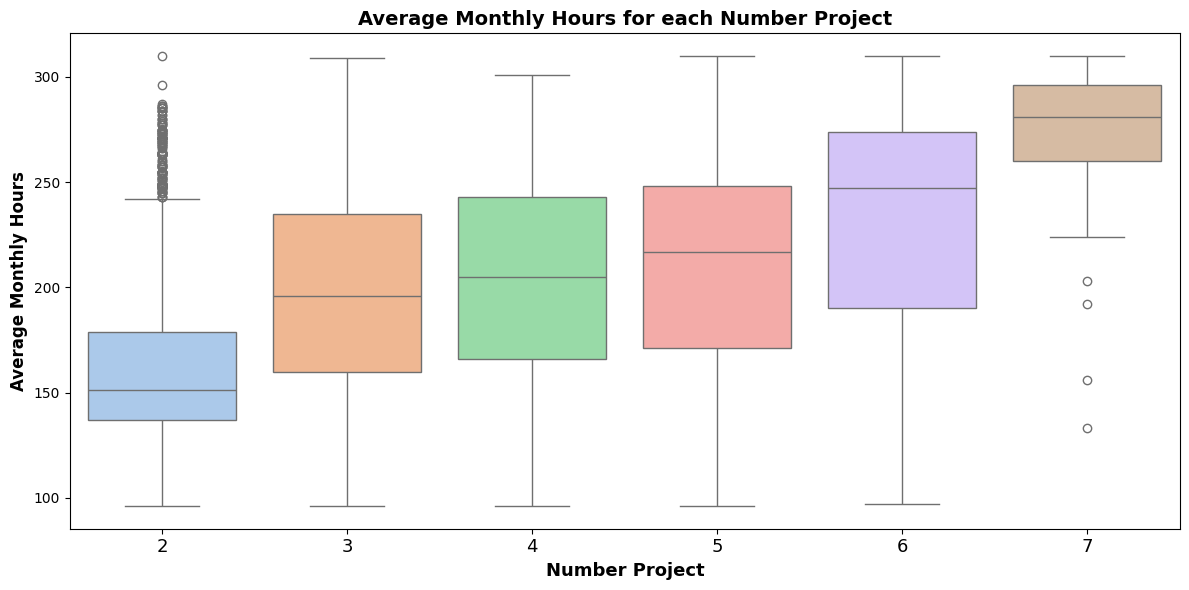

In [58]:
plt.figure(figsize=(12,6))

sns.boxplot(data = df,
            x = 'Number_Project',
            y = 'Average_Monthly_Hours',
            hue= 'Number_Project',
            palette= 'pastel',
            legend= False)
plt.title('Average Monthly Hours for each Number Project', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.xlabel('Number Project', fontsize = 13, fontweight = 'bold')
plt.ylabel('Average Monthly Hours', fontsize = 12, fontweight = 'bold')

plt.tight_layout()

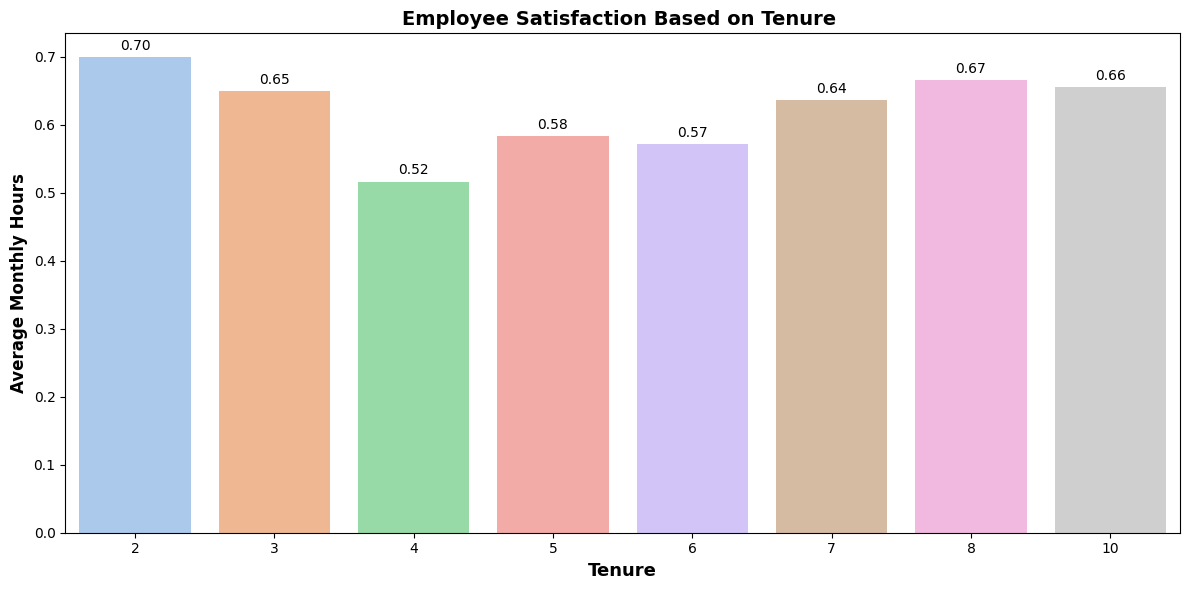

In [59]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data = df,
            x = 'Time_Spend_Company',
            y = 'Satisfaction_Level',
            hue = 'Time_Spend_Company',
            palette= 'pastel',
            errorbar= None,
            legend= None)

plt.title('Employee Satisfaction Based on Tenure ', fontsize = 14, fontweight = 'bold')
plt.xlabel('Tenure', fontsize = 13, fontweight = 'bold')
plt.ylabel('Average Monthly Hours', fontsize = 12, fontweight = 'bold')

for container in ax.containers:
    ax.bar_label(container, fmt= '%.2f', label_type= 'edge', padding = 3)

plt.tight_layout()





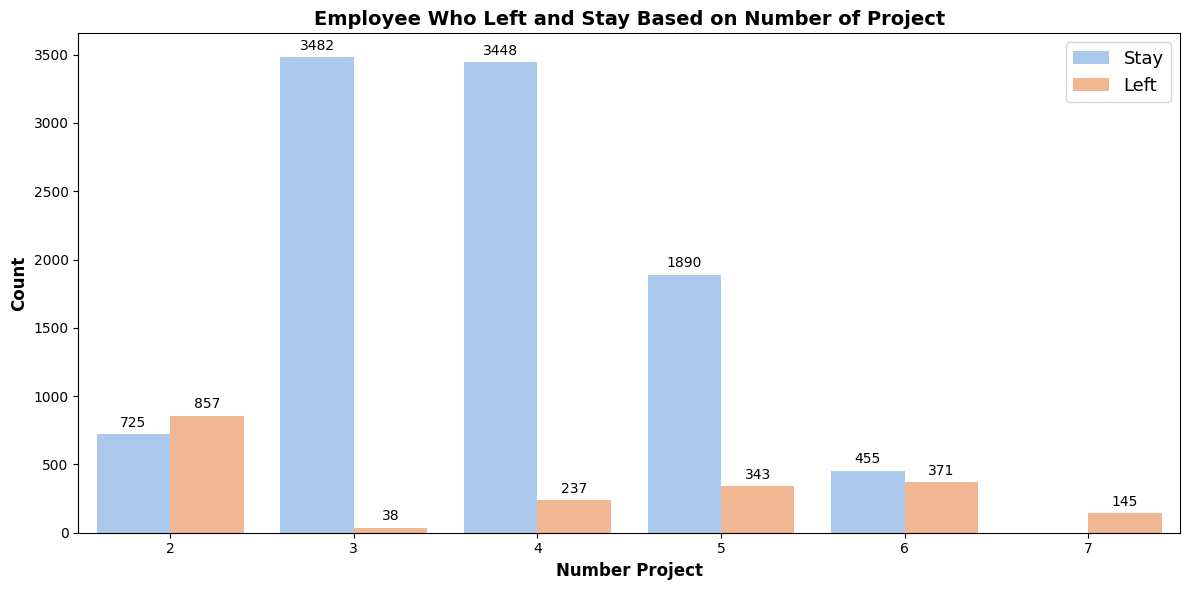

In [60]:
plt.figure(figsize=(12,6))

ax2 = sns.countplot(data = df,
              x = 'Number_Project',
              hue = 'Left',
              palette= 'pastel')

plt.title('Employee Who Left and Stay Based on Number of Project', fontsize = 14, fontweight = 'bold')
plt.xlabel('Number Project', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count',fontsize = 12, fontweight = 'bold')
plt.legend(labels=['Stay', 'Left'], fontsize = 13)

for container in ax2.containers:
    ax2.bar_label(container, fmt= '%.0f', label_type= 'edge', padding= 3)

plt.tight_layout()



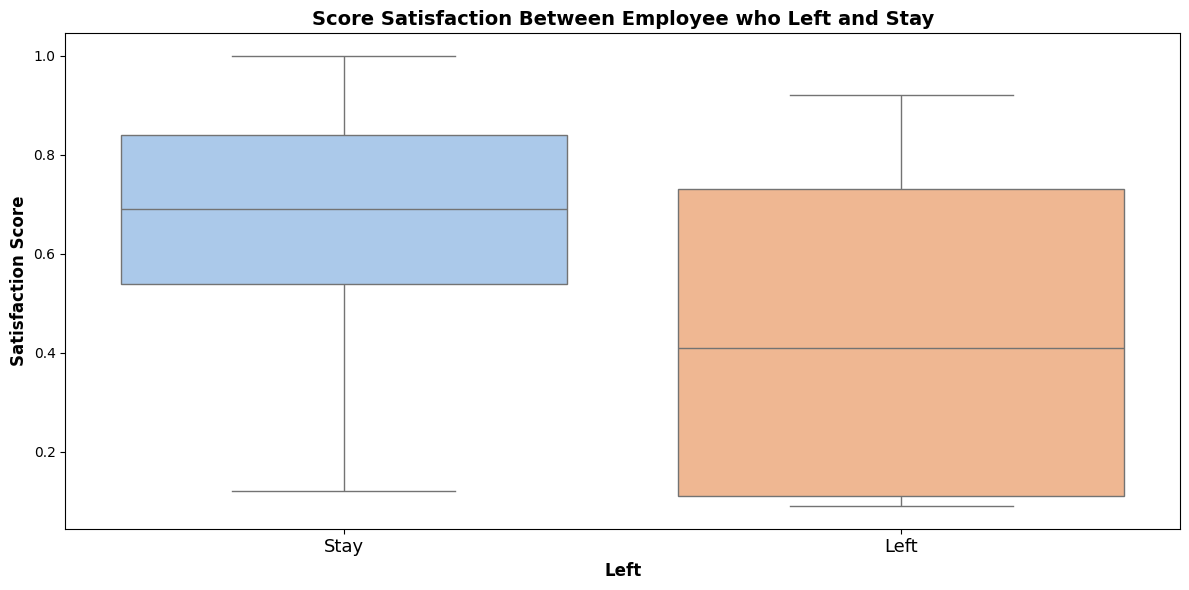

In [61]:
plt.figure(figsize=(12,6))

sns.boxplot(data = df,
            x = 'Left',
            y = 'Satisfaction_Level',
            hue = 'Left',
            palette= 'pastel',
            legend= False)
plt.title('Score Satisfaction Between Employee who Left and Stay', fontsize = 14, fontweight = 'bold')
plt.xticks(ticks=[0, 1], labels=['Stay', 'Left'], fontsize = 13)
plt.xlabel('Left', fontsize = 12, fontweight = 'bold')
plt.ylabel('Satisfaction Score',fontsize = 12, fontweight = 'bold')

plt.tight_layout()

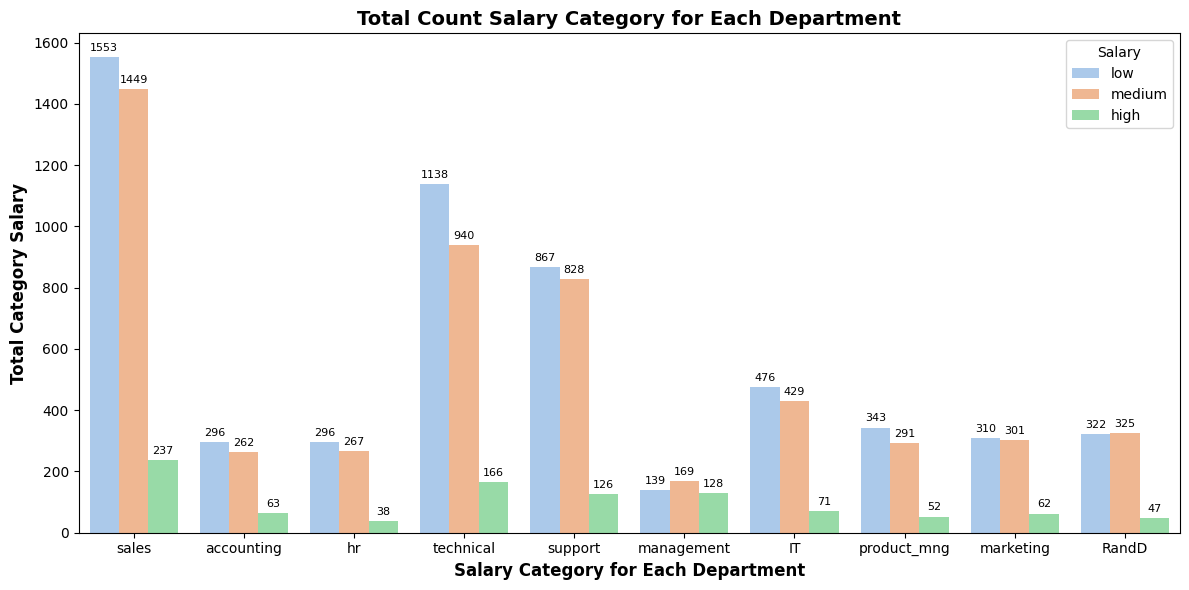

In [62]:
plt.figure(figsize=(12,6))

ax3 = sns.countplot(data = df,
              x = 'Department',
              hue = 'Salary',
              palette= 'pastel')

plt.title('Total Count Salary Category for Each Department', fontsize = 14, fontweight = 'bold')
plt.xlabel('Salary Category for Each Department', fontsize = 12, fontweight = 'bold')
plt.ylabel('Total Category Salary', fontsize = 12, fontweight = 'bold')

for container in ax3.containers:
    ax3.bar_label(container, 
                fmt = '%.0f', 
                label_type= 'edge', 
                padding = 3, 
                fontsize = 8)

plt.tight_layout()

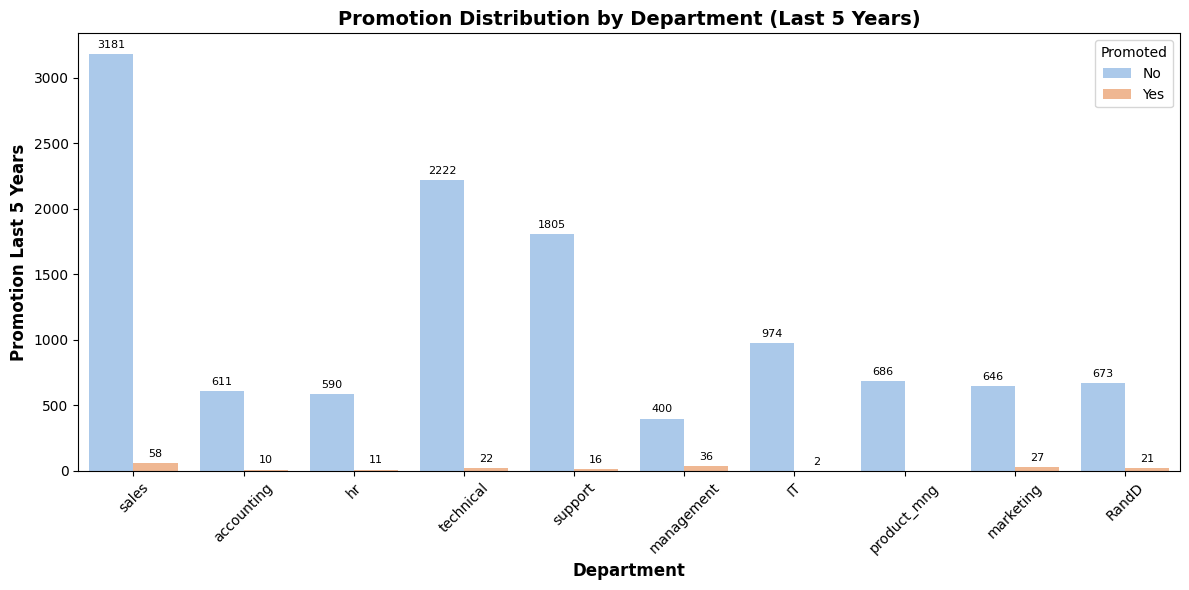

In [63]:
plt.figure(figsize=(12,6))

ax4 = sns.countplot(data=df, 
              x='Department', 
              hue='Promotion_Last_5_Years', 
              palette='pastel')
plt.title('Promotion Distribution by Department (Last 5 Years)', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title='Promoted', labels=['No', 'Yes'])
plt.xlabel('Department', fontsize = 12, fontweight = 'bold')
plt.ylabel('Promotion Last 5 Years', fontsize = 12, fontweight = 'bold')

for container in ax4.containers:
    ax4.bar_label(container,
                  fmt = '%.0f',
                  label_type= 'edge',
                  padding = 3,
                  fontsize = 8)

plt.tight_layout()

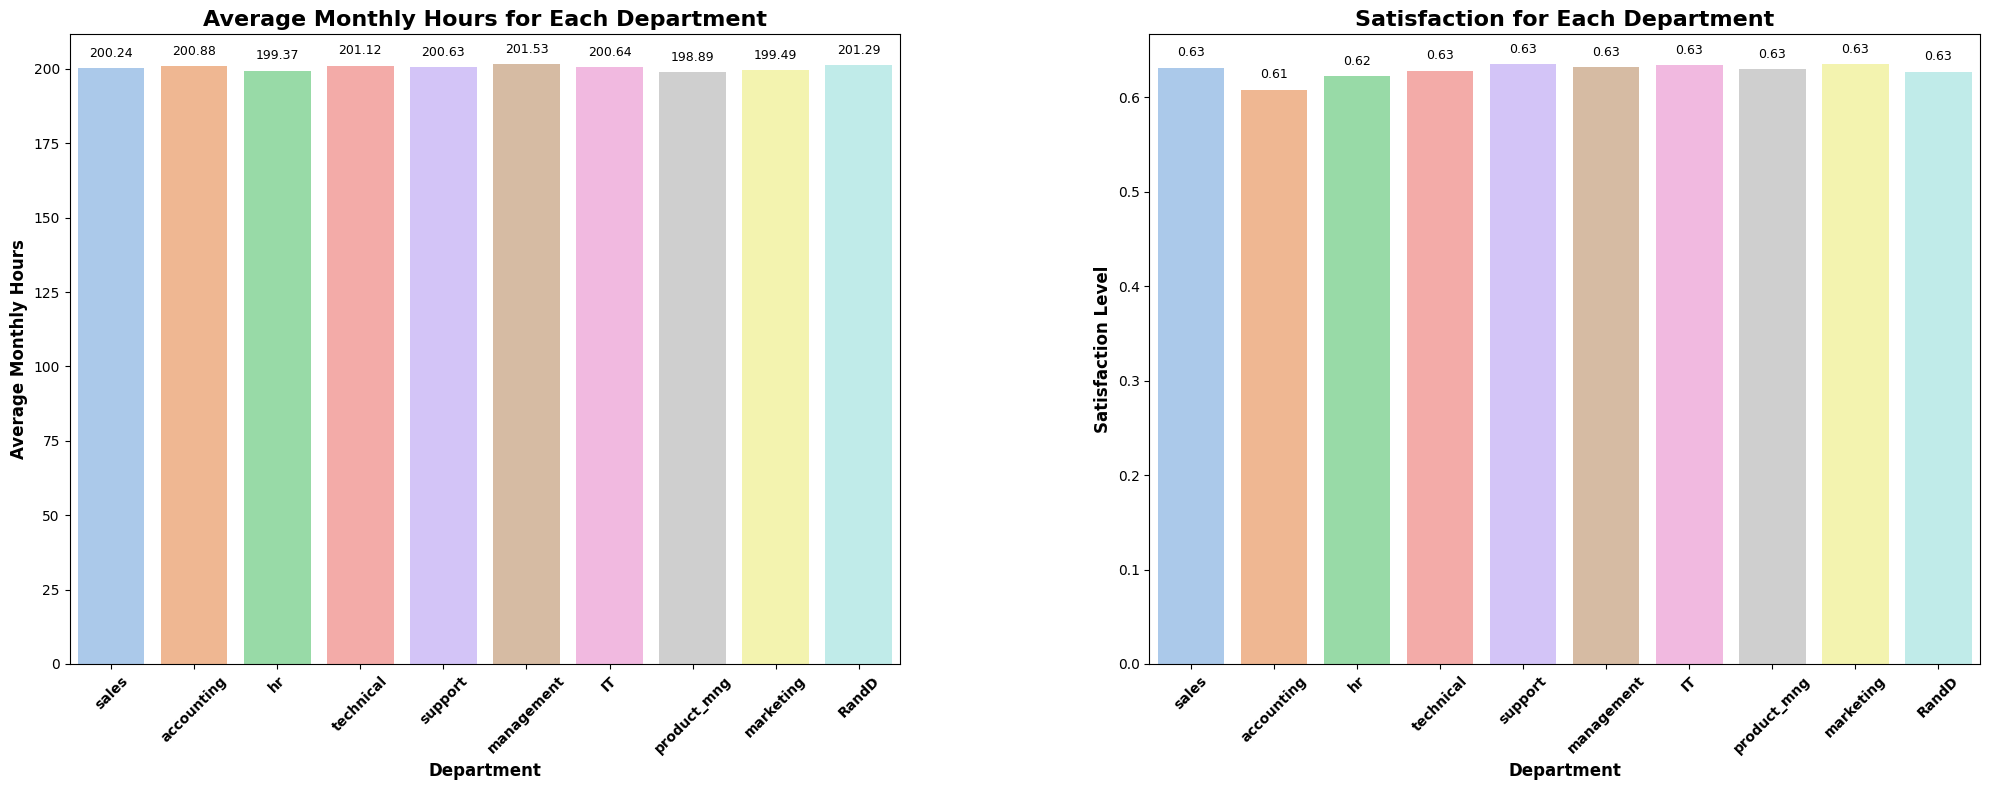

In [64]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
ax5 = sns.barplot(data=df,
                 x='Department',
                 y='Average_Monthly_Hours',
                 hue='Department',
                 palette='pastel',
                 errorbar=None)

plt.title('Average Monthly Hours for Each Department', fontsize=16, fontweight='bold')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Hours', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontweight = 'bold')
plt.legend([],[], frameon=False)  # Sembunyikan legend (karena sama dengan x)

for container in ax5.containers:
    ax5.bar_label(container, fmt='%.2f', label_type='edge', padding=6, fontsize=9)


plt.subplot(1, 2, 2)
ax6 = sns.barplot(data=df,
                  x='Department',
                  y='Satisfaction_Level',
                  hue='Department',
                  palette='pastel',
                  errorbar=None)

plt.title('Satisfaction for Each Department', fontsize=16, fontweight='bold')
plt.xlabel('Department', fontsize=12, fontweight='bold')
plt.ylabel('Satisfaction Level', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontweight = 'bold')
plt.legend([],[], frameon=False)

for container in ax6.containers:
    ax6.bar_label(container, fmt='%.2f', label_type='edge', padding=6, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)


In [65]:
print(f'average satisfaction: {df['Satisfaction_Level'].mean().round(2)}')
print(f'average evaluation: {df['Last_Evaluation'].mean().round(2)}')

average satisfaction: 0.63
average evaluation: 0.72


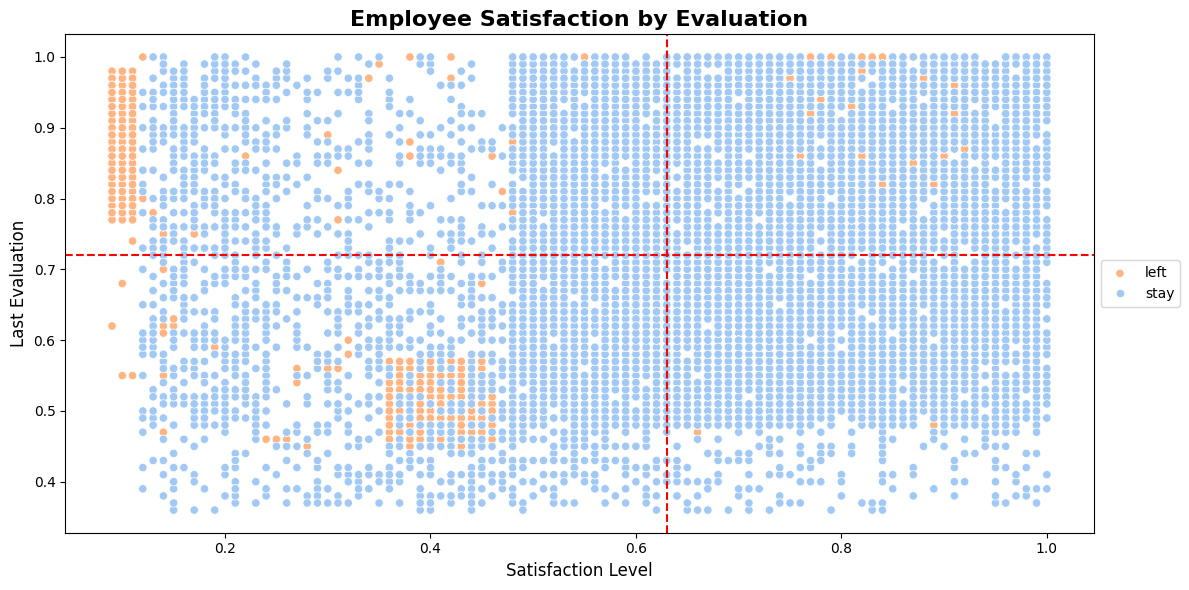

In [66]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df,
                x = 'Satisfaction_Level',
                y = 'Last_Evaluation',
                hue = 'Left',
                palette= 'pastel'
                )

plt.title('Employee Satisfaction by Evaluation', fontsize = 16, fontweight = 'bold')
plt.xlabel('Satisfaction Level', fontsize = 12)
plt.ylabel('Last Evaluation', fontsize = 12)
plt.axhline(y = 0.72, linestyle = '--', color = 'red')
plt.axvline(x = 0.63, linestyle = '--', color = 'red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels = ['left', 'stay'], )

plt.tight_layout()

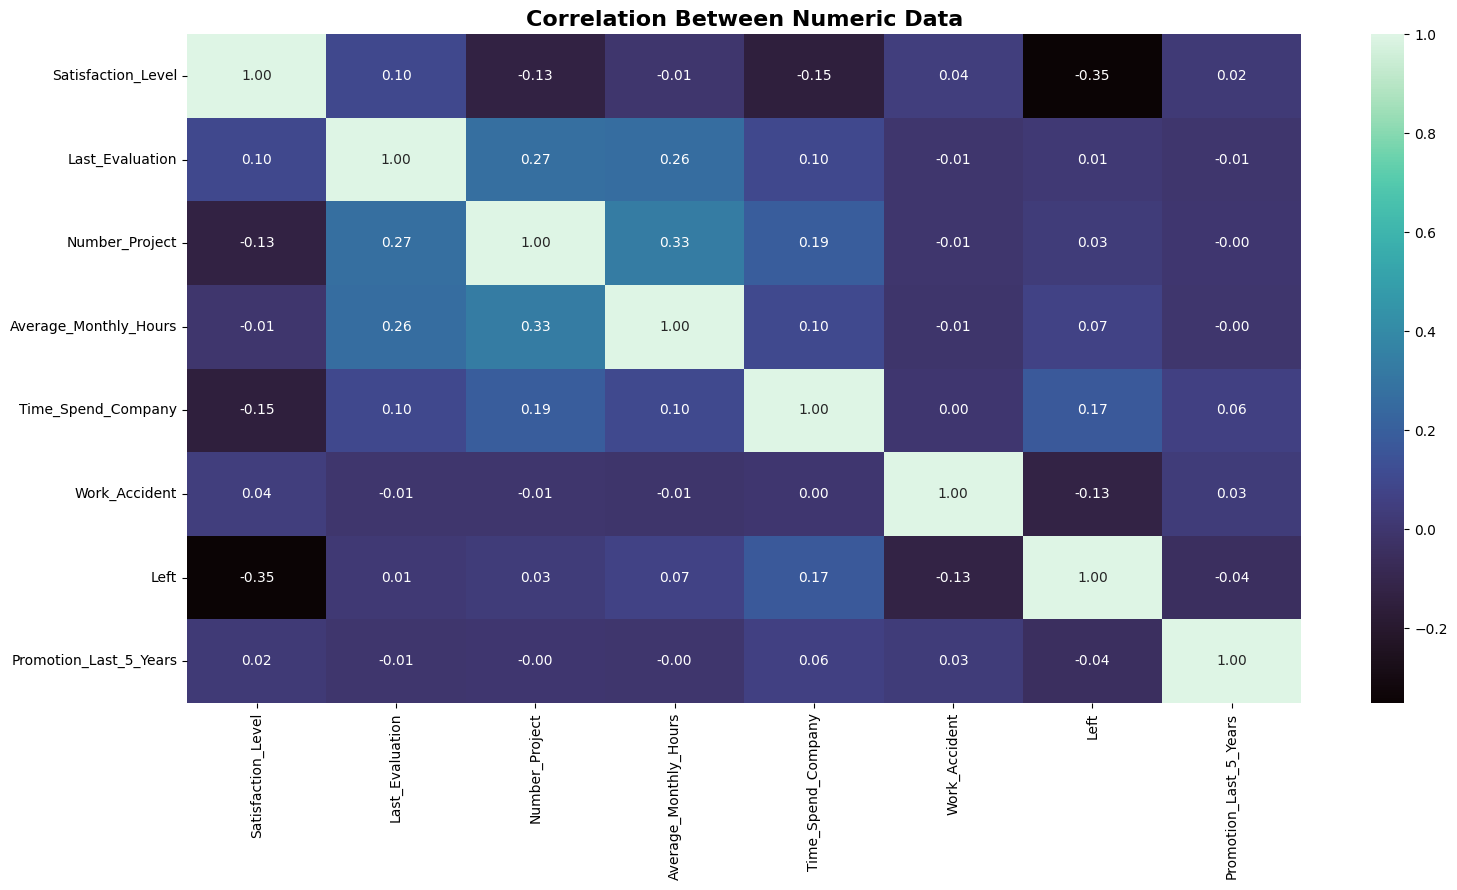

In [67]:
df_corr = df._get_numeric_data().corr()

plt.figure(figsize=(16,9))

sns.heatmap(data = df_corr,
            annot= True,
            cbar = True,
            cmap= 'mako',
            fmt = '.2f')

plt.title('Correlation Between Numeric Data', fontsize = 16, fontweight = 'bold')
plt.tight_layout()

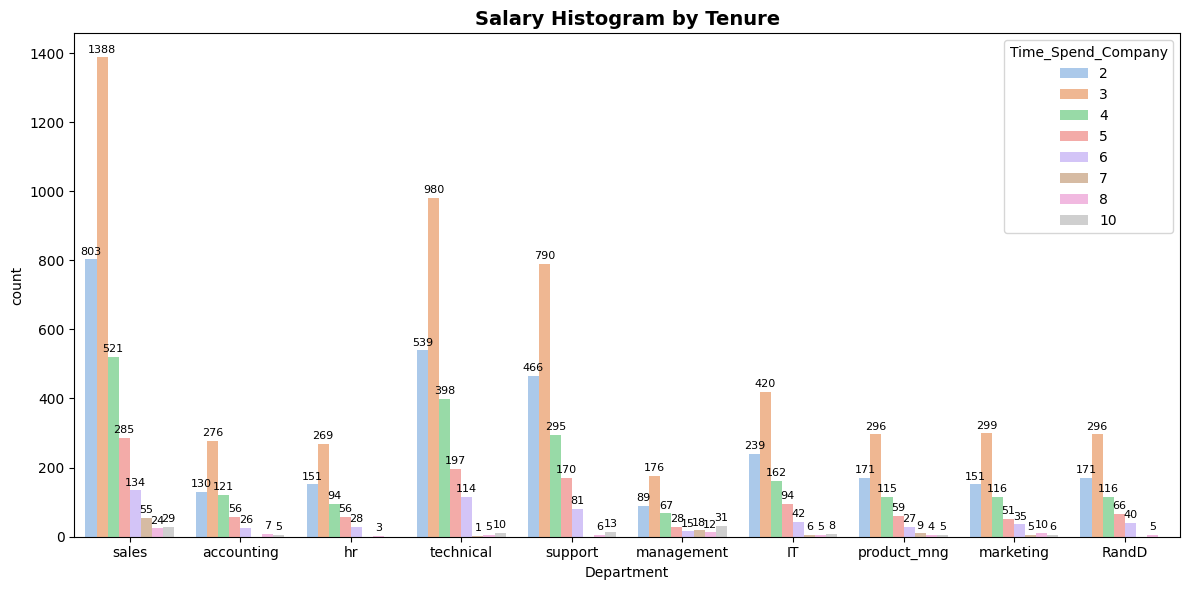

In [68]:
plt.figure(figsize=(12,6))

ax7 = sns.countplot(data = df,
              hue = 'Time_Spend_Company',
              x = 'Department',
              palette = 'pastel')

plt.title('Salary Histogram by Tenure', fontsize = 14, fontweight = 'bold')

for container in ax7.containers:
    ax7.bar_label(container,
                  fmt = '%.0f',
                  label_type= 'edge',
                  padding = 2,
                  fontsize = 8)

plt.tight_layout()

In [69]:
print(df['Average_Monthly_Hours'].mean())

200.4735218080227


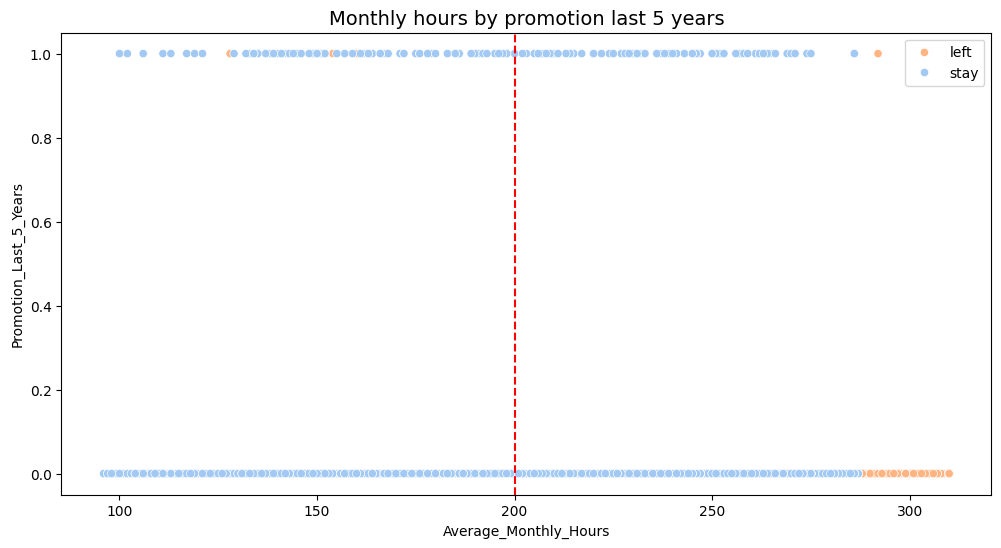

In [70]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df,
                x = 'Average_Monthly_Hours',
                y = 'Promotion_Last_5_Years',
                hue = 'Left',
                palette= 'pastel')

plt.title('Monthly hours by promotion last 5 years', fontsize=14)
plt.axvline(x = 200, linestyle = '--', color = 'red')
plt.legend(labels = ['left','stay'])

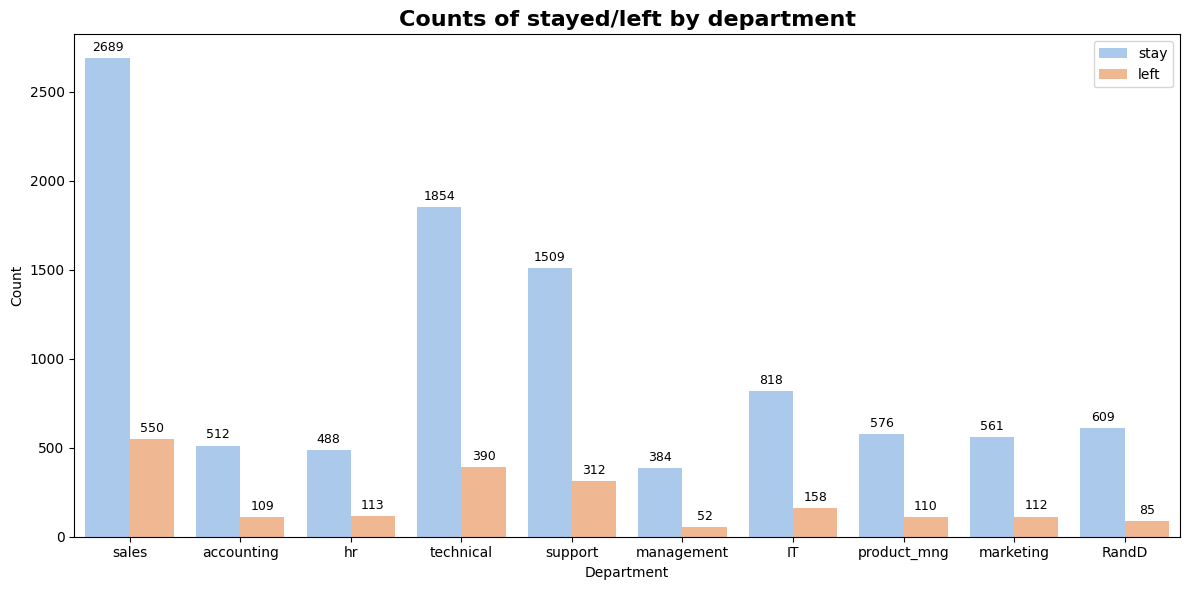

In [71]:
plt.figure(figsize=(12,6))

ax8 = sns.countplot(data = df,
             x = 'Department',
             hue = 'Left',
             palette= 'pastel'
             )

plt.title('Counts of stayed/left by department', fontsize=16, fontweight = 'bold')
plt.ylabel('Count')

plt.legend(labels = ['stay', 'left'])

for container in ax8.containers:
    ax8.bar_label(container, fmt = '%.0f', label_type= 'edge', padding = 3, fontsize = 9)

plt.tight_layout()

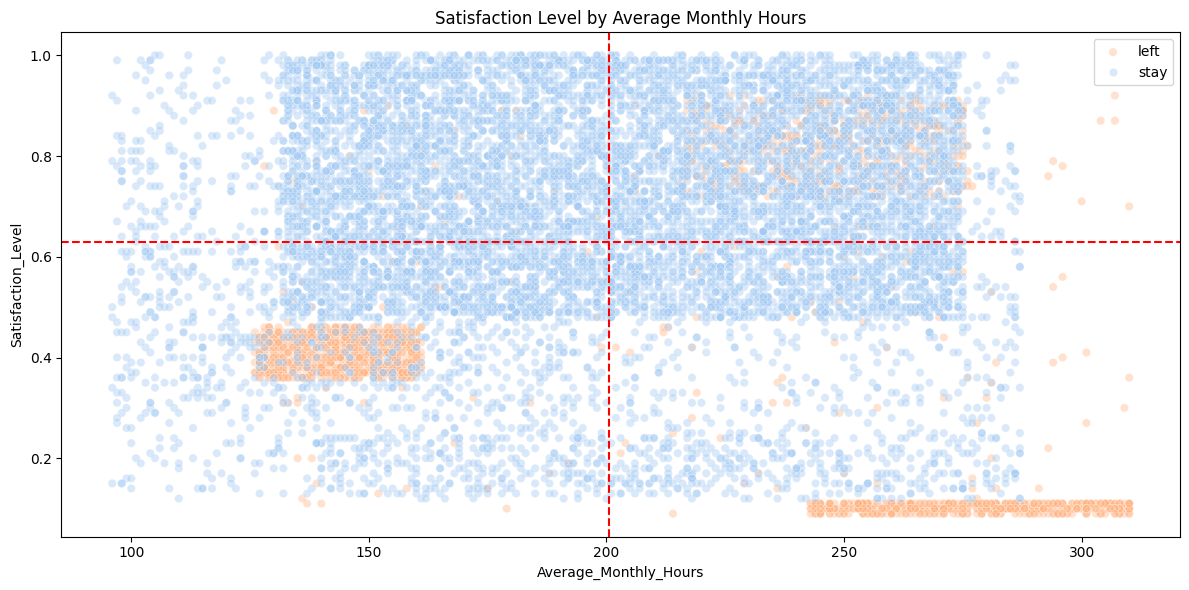

In [72]:
plt.figure(figsize = (12,6))

sns.scatterplot(data = df,
                x = 'Average_Monthly_Hours',
                y = 'Satisfaction_Level',
                hue = 'Left',
                palette= 'pastel',
                alpha = 0.4)

plt.title('Satisfaction Level by Average Monthly Hours')
plt.axvline(x = 200.47, linestyle = '--', color = 'red')
plt.axhline(y = 0.63, linestyle = '--', color = 'red')
plt.legend(labels = ['left', 'stay'])

plt.tight_layout()

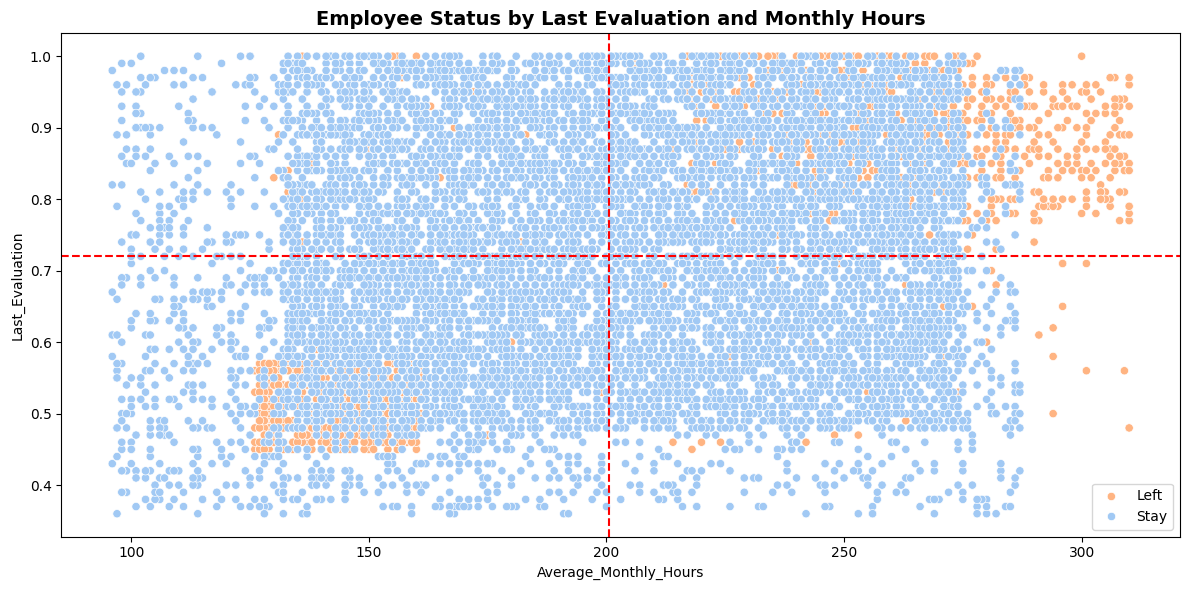

In [73]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df,
                x = 'Average_Monthly_Hours',
                y = 'Last_Evaluation',
                hue = 'Left',
                palette= 'pastel')

plt.title('Employee Status by Last Evaluation and Monthly Hours', fontsize = 14, fontweight = 'bold')

plt.axvline(x = 200.47, linestyle = '--', color = 'red')
plt.axhline(y = 0.72, linestyle = '--', color = 'red')
plt.legend(labels = ['Left', 'Stay'])
plt.tight_layout()



### Recommendec Actions

 ● Set an ideal limit of 3 to 4 projects per employee to ensure workload remains balanced. 
Exceeding this range risks reducing performance and retention.

 ● Enhance promotion pathways and recognition programs, particularly for employees 
with over four years of service who may feel overlooked. Lack of growth opportunities 
can quietly drive disengagement.

 ● Consistently track working hours and provide clear guidance on overtime, leave 
policies, and reward systems. High working hours should not be the sole driver of 
performance evaluations.

 ● Foster regular team and company-wide discussions to uncover underlying work 
culture issues, align expectations, and support a healthier, more motivated workforce.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

---

### 1. **Do you notice anything odd?**  
Yes, although some employees show high job satisfaction, they still choose to leave the company. This seems to be related to their relatively high average working time, which may lead to burnout or imbalance between work and personal life.

---

### 2. **Which independent variables did you choose for the model and why?**  
I included all available variables in the dataset except for the `left` feature, which is the target variable indicating whether an employee resigned or stayed.

---

### 3. **Are each of the assumptions met?**  
I did not perform a multicollinearity check such as VIF, so I cannot confirm whether multicollinearity exists in the data. However, since the models used are tree-based, they are generally robust against multicollinearity.

---

### 4. **How well does your model fit the data?**  
Tree-based models like Decision Tree, Random Forest, and XGBoost performed very well in predicting employee attrition. The models achieved high accuracy and were able to handle the imbalanced class distribution effectively.

---

### 5. **Can you improve it? Is there anything you would change about the model?**  
Yes, I improved the model performance by tuning the hyperparameters using GridSearchCV. This helped optimize the model’s predictive capabilities.

---

### 6. **What resources do you find yourself using as you complete this stage?**  
I did not refer to any external resources while working on this project. All analysis and modeling were based on my understanding and current knowledge.

---

### 7. **Do you have any ethical considerations in this stage?**  
Transparency is the main ethical consideration at this stage. It’s important that any prediction made by the model is communicated clearly and not used as a final judgment on employee decisions without proper context and human review.

---



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [74]:
df.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years Department  \
0                   3              0     1                       0      sales   
1                   6              0     1                       0      sales   
2                   4              0     1                       0      sales   
3                   5              0     1                       0      sales   
4                   3              0     1                       0      sales   

   Salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [75]:
df['Salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [76]:
### YOUR CODE HERE ###

df['Salary'] = df['Salary'].map({
    'low' : 1,
    'medium' : 2,
    'high' : 3
})

df = df[(df['Time_Spend_Company'] >= lower) & (df['Time_Spend_Company'] <= upper)]

df_encoded = pd.get_dummies(data = df,
                    columns= ['Department'], dtype= int)

feature_to_scale = ['Satisfaction_Level', 'Last_Evaluation', 'Average_Monthly_Hours', 'Time_Spend_Company', 'Number_Project', 'Salary']

scaler = StandardScaler()
df_scale = df_encoded.copy()
df_scale[feature_to_scale] = scaler.fit_transform(df_encoded[feature_to_scale])

df_scale.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0           -1.053926        -1.109279       -1.534229              -0.888463   
2           -2.183382         0.979182        2.760766               1.479699   
3            0.368353         0.919512        1.042768               0.470656   
4           -1.095757        -1.168950       -1.534229              -0.847277   
5           -0.928430        -1.288290       -1.534229              -0.970834   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years    Salary  \
0           -0.121393              0     1                       0 -0.937992   
2            0.990661              0     1                       0  0.643789   
3            2.102716              0     1                       0 -0.937992   
4           -0.121393              0     1                       0 -0.937992   
5           -0.121393              0     1                       0 -0.937992   

   Department_IT  Department_RandD  Department_accounting  Department_hr  \
0              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   
5              0                 0                      0              0   

   Department_management  Department_marketing  Department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   Department_sales  Department_support  Department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

# K-Means

In [77]:
num_clusters = np.arange(2,11)

def find_inertia(num_clusters, data):

    inertia = []

    for num in num_clusters:
        kmeans = KMeans(n_clusters= num, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)

    return inertia


In [78]:
inertia = find_inertia(num_clusters, df_scale)

inertia

[66946.37374621534,
 58260.881543952186,
 52209.135178993165,
 48535.746945769904,
 46212.05222434929,
 44196.35967144056,
 42587.24590260895,
 40943.42057414276,
 39493.71293798655]

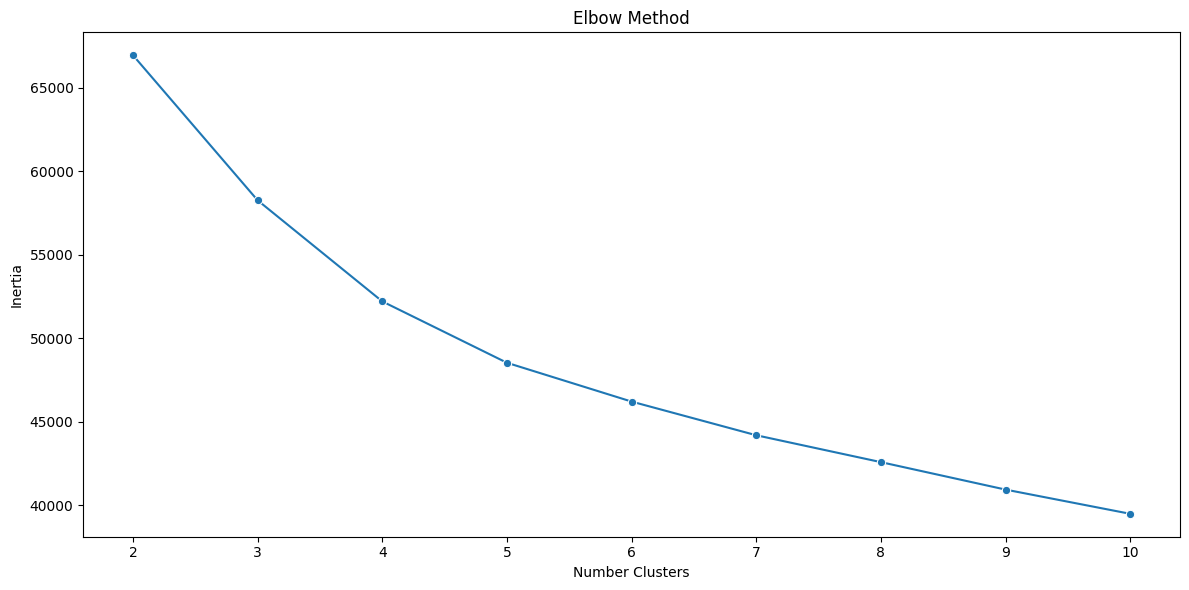

In [79]:
plt.figure(figsize=(12,6))

sns.lineplot(x = num_clusters,
             y = inertia,
             marker = 'o')

plt.title('Elbow Method')
plt.xlabel('Number Clusters')
plt.ylabel('Inertia')

plt.tight_layout()

In [80]:
def find_silhoutte_score(num_clusters, data):
    
    sil_score = []

    for num in num_clusters:
        kmeans = KMeans(n_clusters= num, random_state=42).fit(data)
        sil_score.append(silhouette_score(data, kmeans.labels_))

    return sil_score

In [81]:
sill_score = find_silhoutte_score(num_clusters, df_scale)

sill_score

[np.float64(0.20391939309578413),
 np.float64(0.15786100795454308),
 np.float64(0.15617202367378463),
 np.float64(0.1617376357016513),
 np.float64(0.14352159910542261),
 np.float64(0.1428191985794309),
 np.float64(0.1455067459932867),
 np.float64(0.14157769122882513),
 np.float64(0.14418981389669694)]

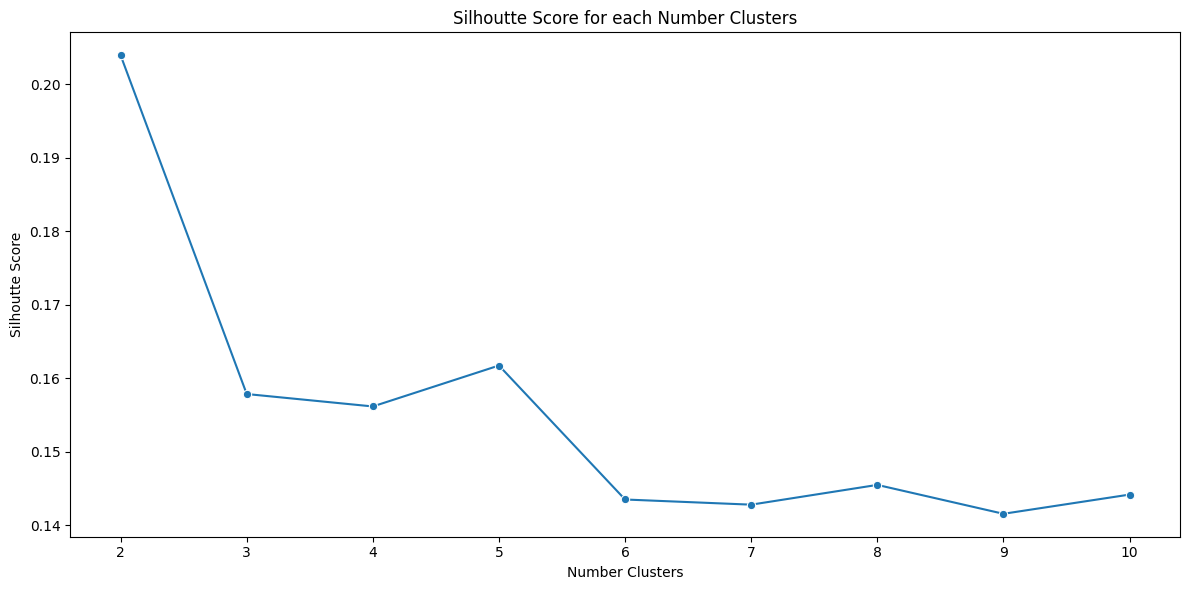

In [82]:
plt.figure(figsize=(12,6))

sns.lineplot(x = num_clusters,
             y = sill_score,
             marker = 'o')

plt.title('Silhoutte Score for each Number Clusters')
plt.xlabel('Number Clusters')
plt.ylabel('Silhoutte Score')

plt.tight_layout()

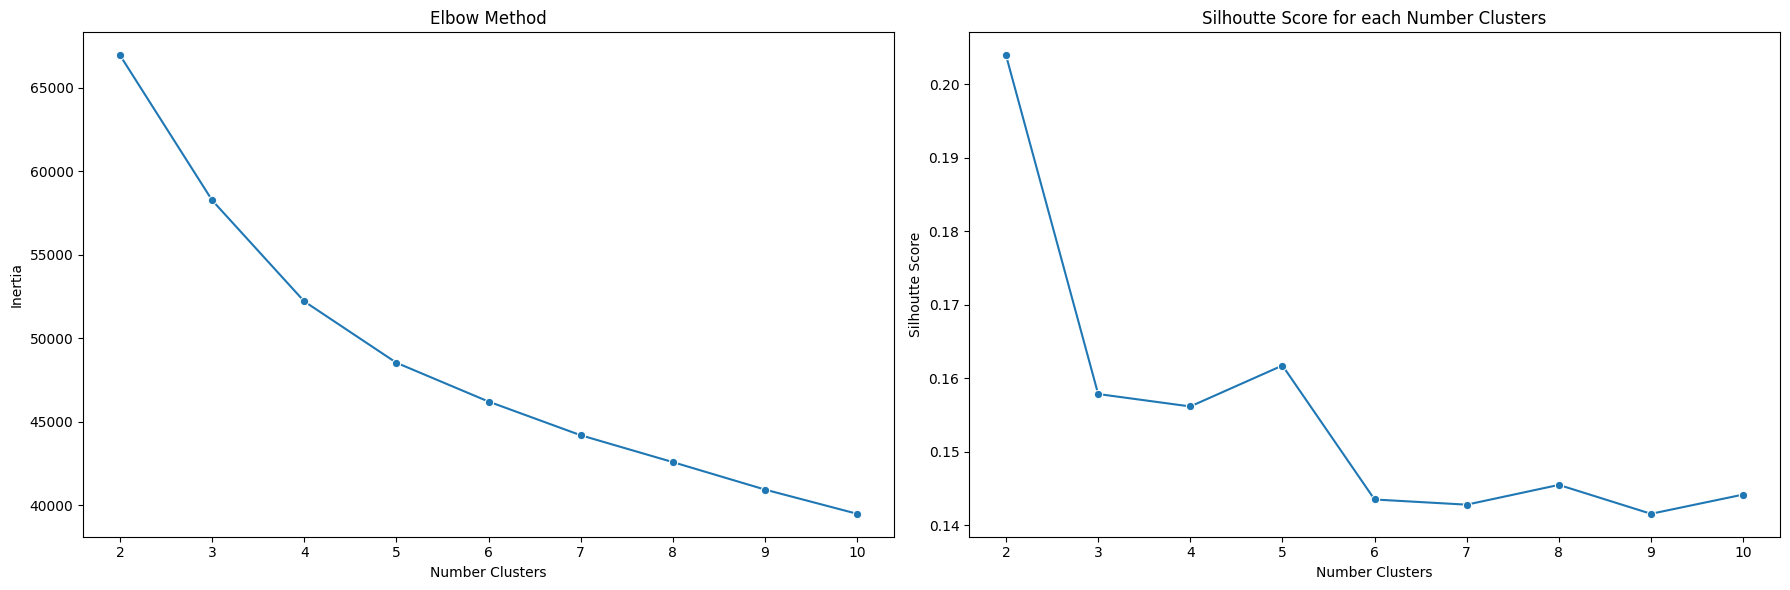

In [83]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x = num_clusters,
             y = inertia,
             marker = 'o')

plt.title('Elbow Method')
plt.xlabel('Number Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
sns.lineplot(x = num_clusters,
             y = sill_score,
             marker = 'o')

plt.title('Silhoutte Score for each Number Clusters')
plt.xlabel('Number Clusters')
plt.ylabel('Silhoutte Score')

plt.tight_layout()

In [84]:
kmeans_2 = KMeans(n_clusters= 2, random_state= 42).fit(df_scale)

In [85]:
kmeans_2.labels_

array([1, 0, 0, ..., 0, 1, 1], shape=(11167,), dtype=int32)

In [86]:
kmeans_2.inertia_

66946.37374621534

In [87]:
kmeans_2.score

<bound method _BaseKMeans.score of KMeans(n_clusters=2, random_state=42)>

In [88]:
df['Cluster'] = kmeans_2.fit_predict(df_scale)

df.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years Department  \
0                   3              0     1                       0      sales   
2                   4              0     1                       0      sales   
3                   5              0     1                       0      sales   
4                   3              0     1                       0      sales   
5                   3              0     1                       0      sales   

   Salary  Cluster  
0       1        1  
2       2        0  
3       1        0  
4       1        1  
5       1        1

In [89]:
summary_kmeans = df.groupby('Cluster').mean(numeric_only=True).round(2)

summary_kmeans

Satisfaction_Level  Last_Evaluation  Number_Project  \
Cluster                                                        
0                      0.46             0.81            4.95   
1                      0.68             0.69            3.45   

         Average_Monthly_Hours  Time_Spend_Company  Work_Accident  Left  \
Cluster                                                                   
0                       234.05                4.21           0.13  0.39   
1                       190.27                2.79           0.16  0.10   

         Promotion_Last_5_Years  Salary  
Cluster                                  
0                          0.01    1.52  
1                          0.02    1.61

# Logistic Regression 

In [90]:
from sklearn.model_selection import train_test_split

df_x = df_scale.copy()
df_x = df_x.drop(columns= ['Left'])

df_y = df_scale['Left']


x_train,x_test, y_train, y_test = train_test_split(df_x, 
                                                   df_y, 
                                                   test_size= 0.3, 
                                                   stratify= df_y, 
                                                   random_state= 42)

In [91]:
logreg = LogisticRegression(random_state= 42, max_iter= 500, class_weight= 'balanced')
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

In [92]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.3f}")

Accuracy: 0.825
Precision: 0.489
Recall: 0.915
F1 Score: 0.637


In [93]:
def conf_matrix_disp(y_model, y_predict, model):

    cm = confusion_matrix(y_true = y_model,
                          y_pred= y_predict,
                          labels= model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                                  display_labels= model.classes_)
    
    disp.plot()

    plt.show()

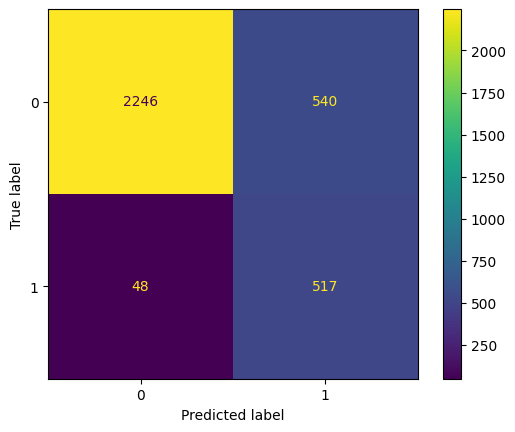

In [94]:
conf_matrix_disp(y_test, y_pred_logreg, logreg)

In [95]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.81      0.88      2786
    Predicted would leave       0.49      0.92      0.64       565

                 accuracy                           0.82      3351
                macro avg       0.73      0.86      0.76      3351
             weighted avg       0.90      0.82      0.84      3351



In [96]:
def results_model(model_name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    
    results = {
        'Model': [model_name],
        'F1': [f1_score(y_val, y_pred)],
        'Recall': [recall_score(y_val, y_pred)],
        'Precision': [precision_score(y_val, y_pred)],
        'Accuracy': [accuracy_score(y_val, y_pred)]
    }
    
    return pd.DataFrame(results)

In [97]:
logreg_results = results_model('Logistic Regression',
                                 logreg,
                                 x_test,
                                 y_test)

logreg_results

Model        F1    Recall  Precision  Accuracy
0  Logistic Regression  0.637485  0.915044    0.48912   0.82453

# GaussianNB Model

In [98]:
gaussian = GaussianNB().fit(x_train, y_train)

y_pred_gaussian = gaussian.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_gaussian):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_gaussian):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_gaussian):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gaussian):.3f}")

Accuracy: 0.842
Precision: 0.520
Recall: 0.800
F1 Score: 0.630


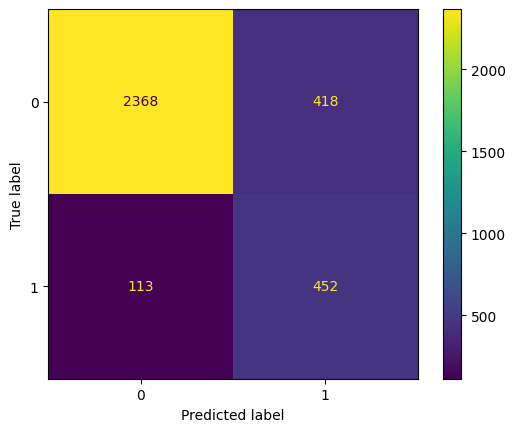

In [99]:
conf_matrix_disp(y_test, y_pred_gaussian, gaussian)

In [100]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_gaussian, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.85      0.90      2786
    Predicted would leave       0.52      0.80      0.63       565

                 accuracy                           0.84      3351
                macro avg       0.74      0.82      0.76      3351
             weighted avg       0.88      0.84      0.85      3351



In [101]:
gaussian_results = results_model('GaussianNB',
                                 gaussian,
                                 x_test,
                                 y_test)

gaussian_results

Model        F1  Recall  Precision  Accuracy
0  GaussianNB  0.629965     0.8    0.51954   0.84154

# Decision Tree Model

In [102]:
#decision_tree = DecisionTreeClassifier(random_state= 42)

# Assign a dictionary of hyperparameters to search over
'''
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }
'''

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy' : 'accuracy',
           'precision' : 'precision', 
           'recall' : 'recall', 
           'f1' : 'f1'}

# Instantiate GridSearch
'''decision_tree_CV = GridSearchCV(estimator=decision_tree,
                   param_grid=cv_params, 
                   scoring=scoring, 
                   cv=4, 
                   refit='f1').fit(x_train, y_train)'''

"decision_tree_CV = GridSearchCV(estimator=decision_tree,\n                   param_grid=cv_params, \n                   scoring=scoring, \n                   cv=4, \n                   refit='f1').fit(x_train, y_train)"

In [103]:
#dump(decision_tree_CV, 'Gridsearch Decision Tree.joblib')

In [104]:
decision_tree_CV = load('Gridsearch Decision Tree.joblib')

In [105]:
decision_tree_CV.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [106]:
decision_tree_CV.best_score_

np.float64(0.9492611767661059)

In [107]:
importance_dt = decision_tree_CV.best_estimator_.feature_importances_

importance_dt = pd.DataFrame(importance_dt, 
                             index= df_x.columns, 
                             columns = ['importance_score']
                             ).sort_values('importance_score', ascending=False)

importance_dt = importance_dt.rename_axis("Feature_Name")

importance_dt

importance_score
Feature_Name                            
Satisfaction_Level              0.539956
Time_Spend_Company              0.160556
Last_Evaluation                 0.133720
Number_Project                  0.112733
Average_Monthly_Hours           0.050269
Salary                          0.001420
Department_technical            0.000746
Department_accounting           0.000456
Department_support              0.000143
Work_Accident                   0.000000
Department_RandD                0.000000
Department_IT                   0.000000
Promotion_Last_5_Years          0.000000
Department_hr                   0.000000
Department_marketing            0.000000
Department_management           0.000000
Department_sales                0.000000
Department_product_mng          0.000000

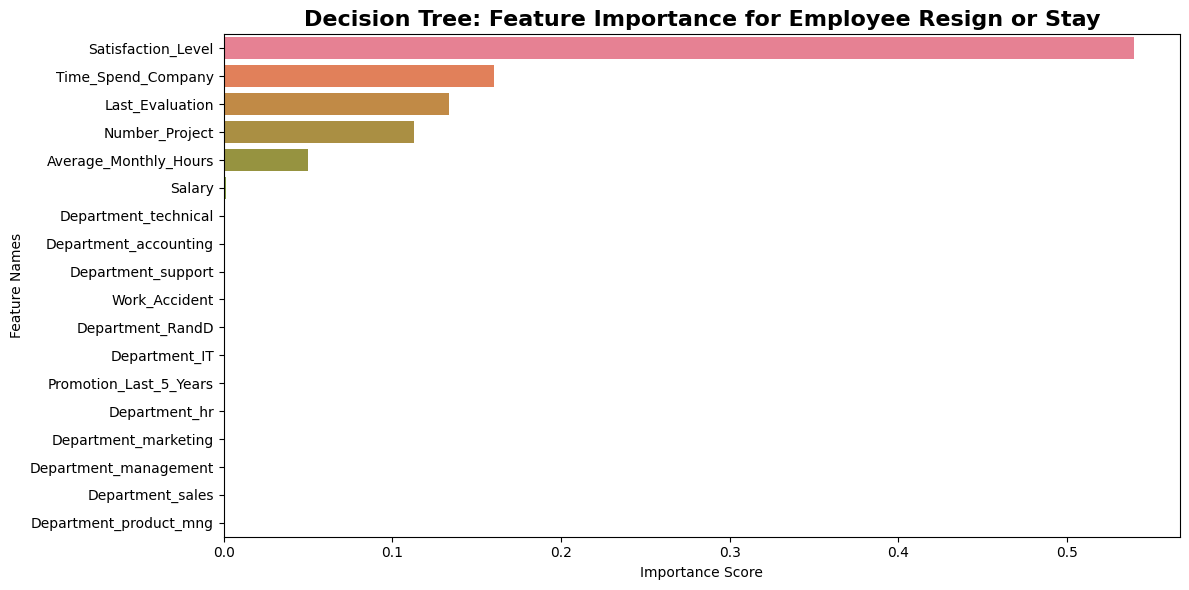

In [108]:
plt.figure(figsize= (12,6))

sns.barplot(data = importance_dt,
            y = importance_dt.index,
            x = 'importance_score',
            hue = importance_dt.index)

plt.title('Decision Tree: Feature Importance for Employee Resign or Stay', fontsize = 16, fontweight = 'bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature Names')

plt.tight_layout()

In [109]:
y_pred_dt = decision_tree_CV.best_estimator_.predict(x_test)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2786
    Predicted would leave       0.97      0.92      0.94       565

                 accuracy                           0.98      3351
                macro avg       0.98      0.96      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



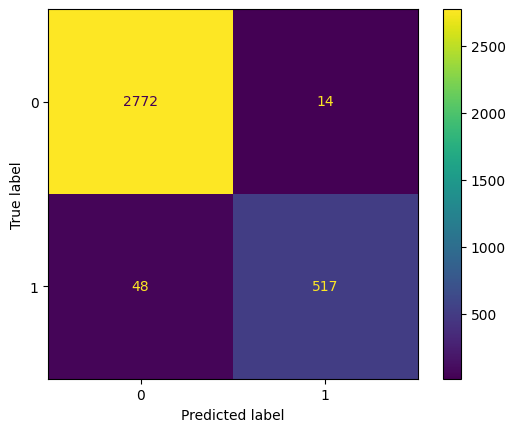

In [110]:
conf_matrix_disp(y_test,
                 y_pred_dt,
                 decision_tree_CV)

In [111]:
dt_cv_results = results_model('Decision_Tree_CV',
                                decision_tree_CV,
                                x_test,
                                y_test)

dt_cv_results

Model        F1    Recall  Precision  Accuracy
0  Decision_Tree_CV  0.943431  0.915044   0.973635  0.981498

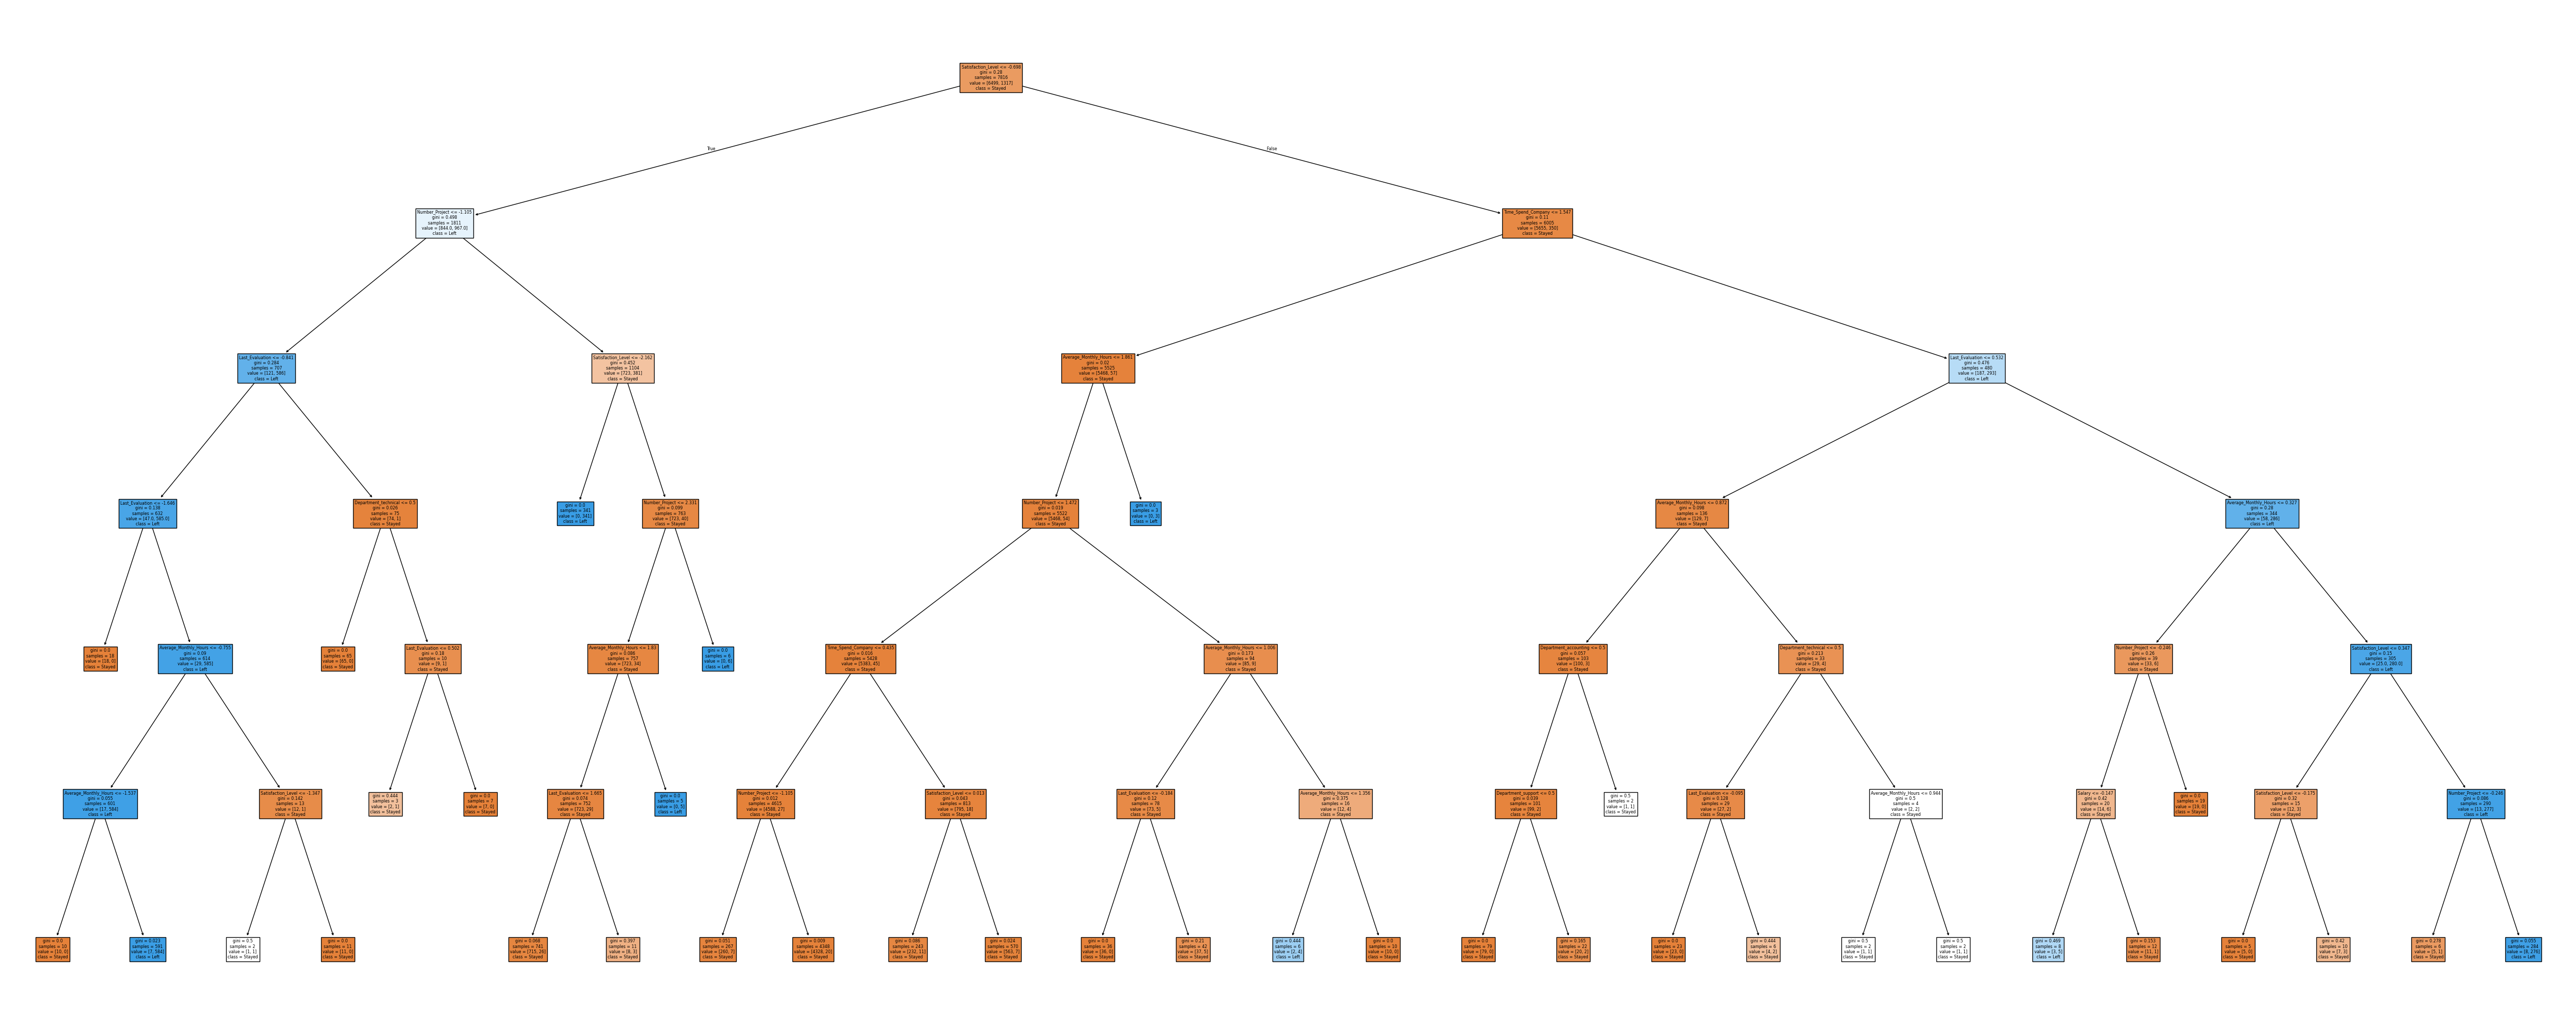

In [112]:
plt.figure(figsize=(50,20))

plot_tree(decision_tree= decision_tree_CV.best_estimator_,
          feature_names= df_x.columns,
          class_names= {0 : 'Stayed', 1 : 'Left'},
          filled=True
          )

plt.tight_layout()

# Random Forest

In [113]:
#randomforest = RandomForestClassifier(random_state=0)

'''cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }''' 

#scoring = scoring

'''random_forest_cv = GridSearchCV(estimator= randomforest,
                                param_grid= cv_params,
                                scoring= scoring,
                                cv = 4,
                                refit= 'f1').fit(x_train, y_train)'''


"random_forest_cv = GridSearchCV(estimator= randomforest,\n                                param_grid= cv_params,\n                                scoring= scoring,\n                                cv = 4,\n                                refit= 'f1').fit(x_train, y_train)"

In [114]:
#dump(random_forest_cv, 'Gridsearch Random Forest.joblib')

In [115]:
random_forest_cv = load('Gridsearch Random Forest.joblib')

In [116]:
random_forest_cv.best_score_

np.float64(0.9546119692243804)

In [117]:
random_forest_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [118]:
y_pred_rf = random_forest_cv.best_estimator_.predict(x_test)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2786
    Predicted would leave       0.99      0.92      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.99      0.96      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



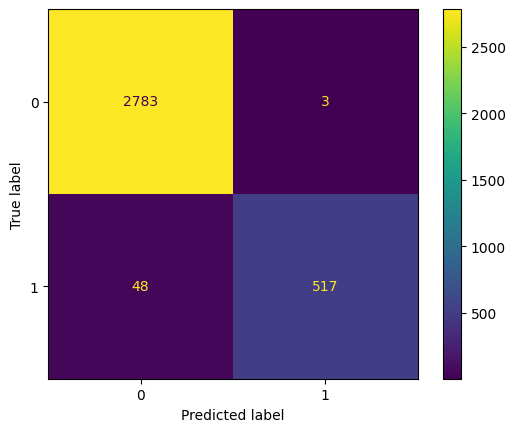

In [119]:
conf_matrix_disp(y_test,
                 y_pred_rf,
                 random_forest_cv)

In [120]:
importance_rf = random_forest_cv.best_estimator_.feature_importances_

importance_rf = pd.DataFrame(importance_rf, 
                             index= df_x.columns, 
                             columns = ['importance_score']
                             ).sort_values('importance_score', ascending=False)

importance_rf = importance_rf.rename_axis("Feature_Name")

importance_rf

importance_score
Feature_Name                            
Satisfaction_Level              0.488030
Time_Spend_Company              0.153336
Number_Project                  0.144232
Last_Evaluation                 0.126006
Average_Monthly_Hours           0.071239
Salary                          0.003065
Department_sales                0.002376
Department_support              0.002010
Department_technical            0.001934
Department_accounting           0.001300
Department_RandD                0.001165
Department_hr                   0.001022
Department_marketing            0.001006
Department_management           0.000896
Department_IT                   0.000877
Work_Accident                   0.000802
Department_product_mng          0.000583
Promotion_Last_5_Years          0.000122

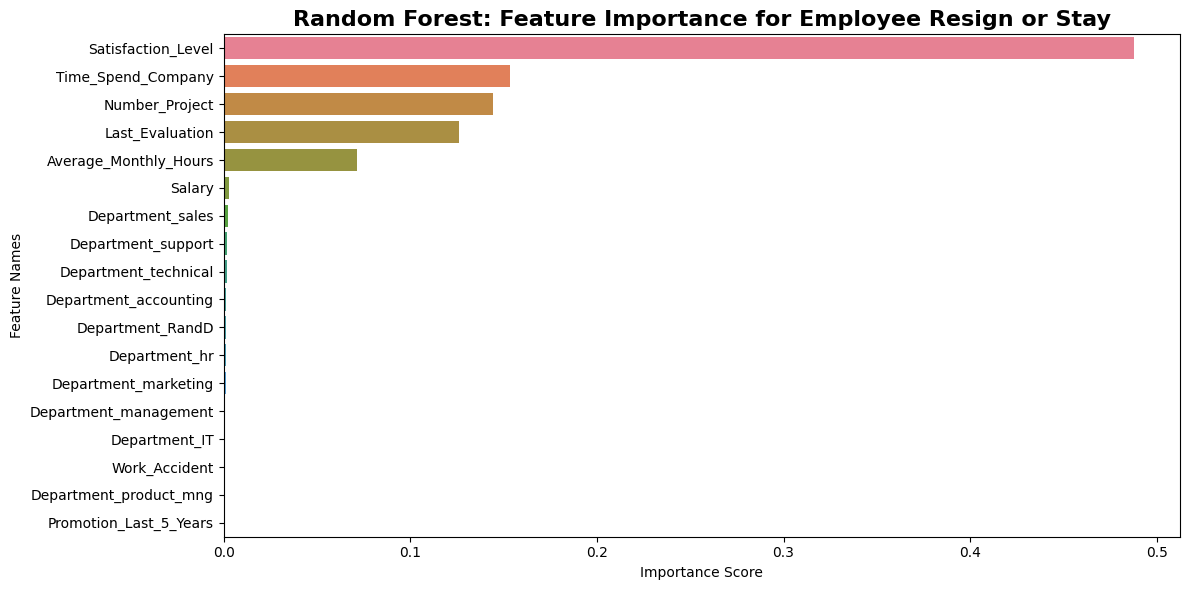

In [121]:
plt.figure(figsize= (12,6))

sns.barplot(data = importance_rf,
            y = importance_rf.index,
            x = 'importance_score',
            hue = importance_rf.index)

plt.title('Random Forest: Feature Importance for Employee Resign or Stay', fontsize = 16, fontweight = 'bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature Names')


plt.tight_layout()

In [122]:
df_random_forest = pd.DataFrame(random_forest_cv.cv_results_
                                )

df_random_forest

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.932827      0.322274         0.076038        0.045403   
1         2.561391      0.094858         0.078760        0.003649   
2         1.497704      0.025799         0.053092        0.006606   
3         2.454039      0.032773         0.069989        0.002093   
4         1.526703      0.029414         0.049421        0.002562   
..             ...           ...              ...             ...   
103       9.290970      2.447603         0.149262        0.047010   
104       4.174291      0.102189         0.077401        0.003799   
105       7.321256      0.737925         0.128342        0.005450   
106       5.383565      0.634729         0.104910        0.045847   
107       7.727916      1.898911         0.284940        0.281944   

    param_max_depth  param_max_features  param_max_samples  \
0                 3                 1.0                0.7   
1                 3                 1.0                0.7   
2                 3                 1.0                0.7   
3                 3                 1.0                0.7   
4                 3                 1.0                0.7   
..              ...                 ...                ...   
103            None                 1.0                1.0   
104            None                 1.0                1.0   
105            None                 1.0                1.0   
106            None                 1.0                1.0   
107            None                 1.0                1.0   

     param_min_samples_leaf  param_min_samples_split  param_n_estimators  ...  \
0                         1                        2                 300  ...   
1                         1                        2                 500  ...   
2                         1                        3                 300  ...   
3                         1                        3                 500  ...   
4                         1                        4                 300  ...   
..                      ...                      ...                 ...  ...   
103                       3                        2                 500  ...   
104                       3                        3                 300  ...   
105                       3                        3                 500  ...   
106                       3                        4                 300  ...   
107                       3                        4                 500  ...   

    mean_test_recall  std_test_recall  rank_test_recall  split0_test_f1  \
0           0.920268         0.013685                47        0.912072   
1           0.920268         0.013685                47        0.912072   
2           0.920268         0.013685                47        0.912072   
3           0.920268         0.013685                47        0.912072   
4           0.920268         0.013685                47        0.912072   
..               ...              ...               ...             ...   
103         0.918746         0.021561                91        0.954899   
104         0.918746         0.021561                91        0.954899   
105         0.918746         0.021561                91        0.954899   
106         0.918746         0.021561                91        0.954899   
107         0.918746         0.021561                91        0.954899   

     split1_test_f1  split2_test_f1  split3_test_f1  mean_test_f1  \
0          0.923318        0.922844        0.923077      0.920328   
1          0.923318        0.922844        0.923077      0.920328   
2          0.923318        0.922844        0.923077      0.920328   
3          0.923318        0.922844        0.923077      0.920328   
4          0.923318        0.922844        0.923077      0.920328   
..              ...             ...             ...           ...   
103        0.933977        0.951788        0.950464      0.947782   
104  

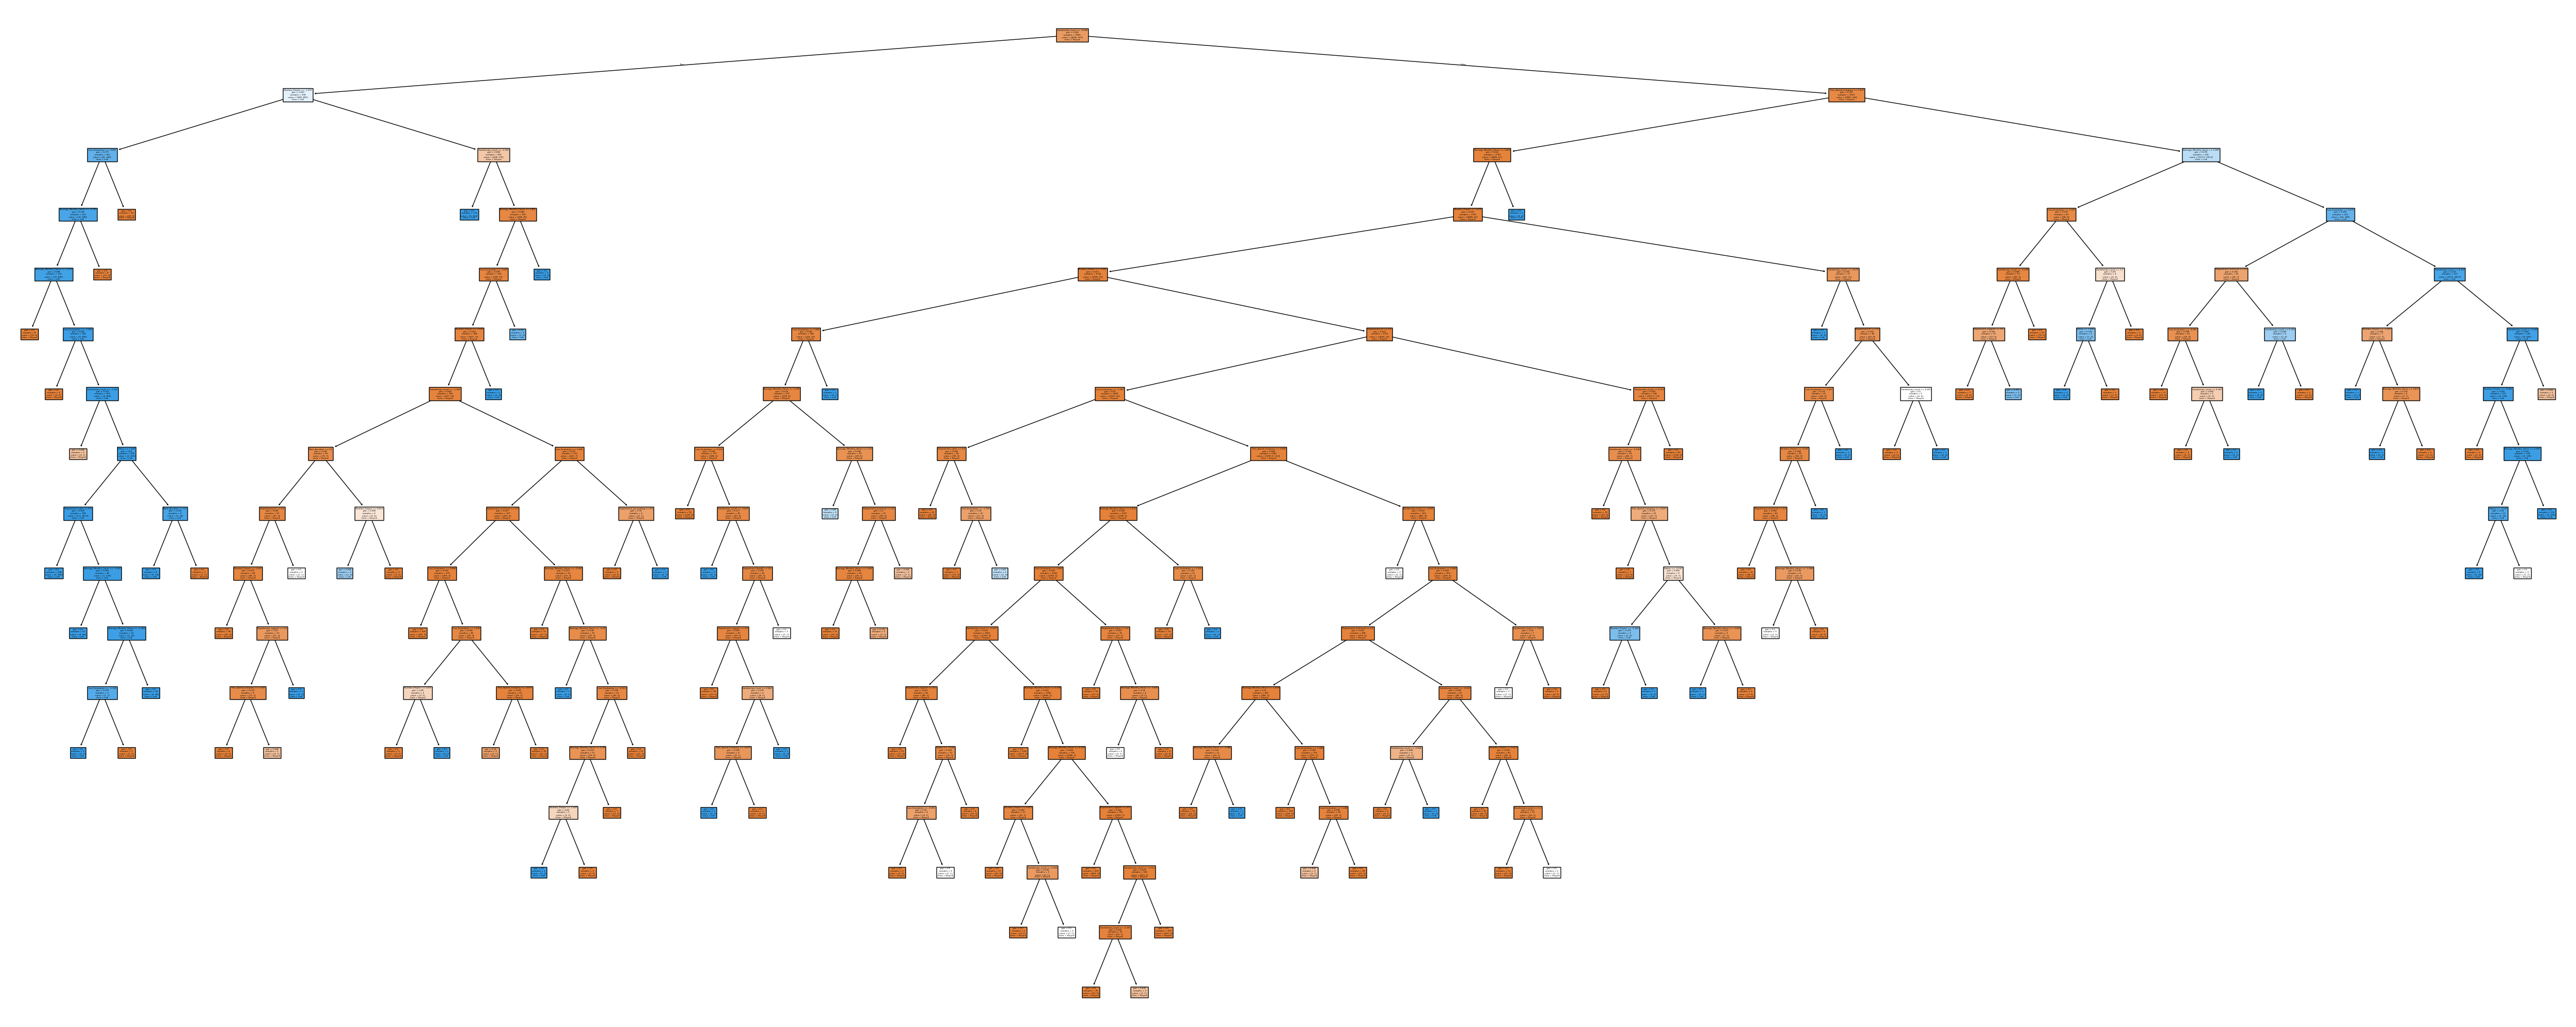

In [123]:
plt.figure(figsize=(50,20))

plot_tree(decision_tree= random_forest_cv.best_estimator_[0],
          feature_names= df_x.columns,
          class_names= {0 : 'Stayed', 1 : 'Left'},
          filled=True
          )

plt.tight_layout()

plt.savefig("Random Forest Plot.png", dpi=300)

In [124]:
rf_cv_results = results_model('Random Forest_CV',
                                random_forest_cv,
                                x_test,
                                y_test)

rf_cv_results

Model        F1    Recall  Precision  Accuracy
0  Random Forest_CV  0.952995  0.915044   0.994231  0.984781

# XGBoost

In [125]:
y_train.value_counts()

Left
0    6499
1    1317
Name: count, dtype: int64

In [126]:
scale_pos_weight = 6499 / 1317

scale_pos_weight

4.934700075930144

In [127]:
#xgboost = XGBClassifier(objective= 'binary:logistic', random_state = 42, scale_pos_weight = 4.93)

'''cv_params = {'max_depth': [4, 6],
               'min_child_weight': [3, 5],
               'learning_rate': [0.1, 0.2, 0.3],
               'n_estimators': [5,10,15],
               'subsample': [0.7],
               'colsample_bytree': [0.7]
               }'''

scoring = scoring

'''xgb_cv = GridSearchCV(estimator= xgboost,
                      param_grid= cv_params,
                      scoring= scoring,
                     cv = 5,
                     refit = 'f1').fit(x_train, y_train)'''

"xgb_cv = GridSearchCV(estimator= xgboost,\n                      param_grid= cv_params,\n                      scoring= scoring,\n                     cv = 5,\n                     refit = 'f1').fit(x_train, y_train)"

In [128]:
#dump(xgb_cv, 'Gridsearch XGBoost.joblib')

In [129]:
xgb_cv = load('Gridsearch XGBoost.joblib')

In [130]:
print(xgb_cv)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7]

In [131]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [132]:
xgb_cv.best_score_

np.float64(0.935049391732667)

In [133]:
y_pred_xgb = xgb_cv.best_estimator_.predict(x_test)


In [134]:
print(classification_report(y_true= y_test,
                      y_pred= y_pred_xgb,
                      target_names= target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2786
    Predicted would leave       0.97      0.92      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.98      0.96      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



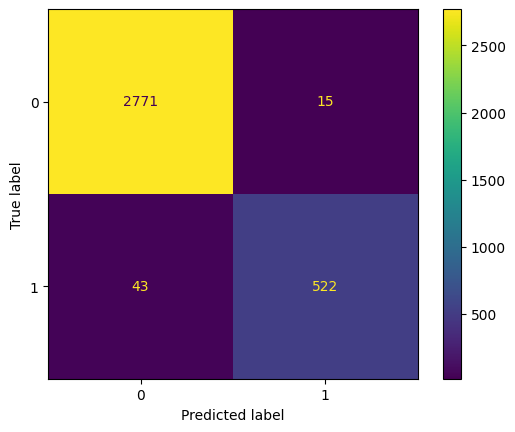

In [135]:
conf_matrix_disp(y_test, y_pred_xgb, xgb_cv)

In [136]:
importance_xgb = xgb_cv.best_estimator_.feature_importances_
importance_xgb = pd.DataFrame(importance_xgb, 
                              index= df_x.columns,
                              columns= ['importance_score']
                              ).sort_values('importance_score', ascending= False)

importance_xgb.rename_axis('Feature', inplace=True)

importance_xgb

importance_score
Feature                                 
Time_Spend_Company              0.473658
Satisfaction_Level              0.190943
Number_Project                  0.079902
Average_Monthly_Hours           0.077893
Last_Evaluation                 0.072666
Work_Accident                   0.019570
Department_support              0.014893
Department_technical            0.014471
Salary                          0.011156
Department_hr                   0.010993
Department_sales                0.009820
Department_marketing            0.009805
Department_IT                   0.008037
Department_product_mng          0.003529
Department_management           0.001413
Promotion_Last_5_Years          0.001250
Department_RandD                0.000000
Department_accounting           0.000000

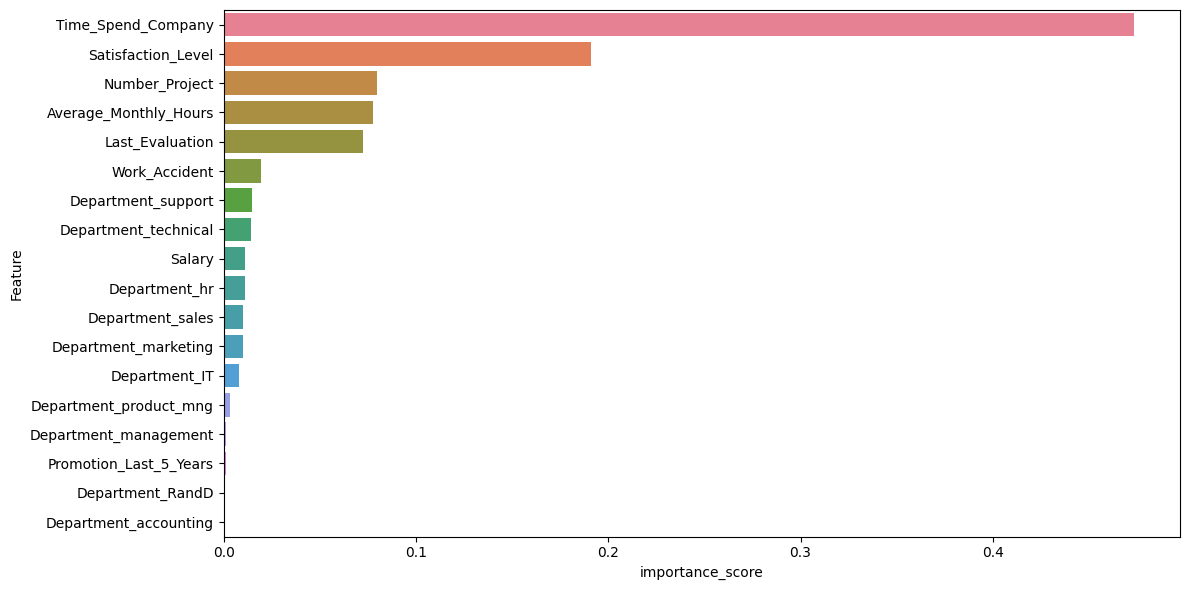

In [137]:
plt.figure(figsize=(12,6))

sns.barplot(data = importance_xgb,
            y = importance_xgb.index,
            x = 'importance_score',
            hue = importance_xgb.index)

plt.tight_layout()

In [138]:
xgb_cv_results = results_model('XGBoost',
                               xgb_cv,
                               x_test,
                               y_test)

In [139]:
results = pd.concat(
    [logreg_results, gaussian_results, dt_cv_results, rf_cv_results, xgb_cv_results], axis = 0, ignore_index = True
    ).sort_values('F1', ascending=False).reset_index(drop=True)

results.head()

Model        F1    Recall  Precision  Accuracy
0     Random Forest_CV  0.952995  0.915044   0.994231  0.984781
1              XGBoost  0.947368  0.923894   0.972067  0.982692
2     Decision_Tree_CV  0.943431  0.915044   0.973635  0.981498
3  Logistic Regression  0.637485  0.915044   0.489120  0.824530
4           GaussianNB  0.629965  0.800000   0.519540  0.841540

In [140]:
df_results = x_test.copy()

df_results['Actual'] = y_test
df_results['Predict_Logistic'] = y_pred_logreg
df_results['Predict_Gaussian'] = y_pred_gaussian
df_results['Predict_Decision_Tree'] = y_pred_dt
df_results['Predict_Random_Forest'] = y_pred_rf
df_results['Predict_XGBoost'] = y_pred_xgb

df_results.head()

Satisfaction_Level  Last_Evaluation  Number_Project  \
290            -0.970262        -1.526972       -1.534229   
3501            0.075531        -2.123675       -1.534229   
7734           -1.221253         0.382479        1.042768   
7195           -0.510113        -0.810928        0.183769   
937            -2.183382         0.501820        1.901767   

      Average_Monthly_Hours  Time_Spend_Company  Work_Accident  \
290               -1.485651           -0.121393              0   
3501               1.685626           -0.121393              0   
7734              -1.300317            0.990661              0   
7195              -0.641350           -1.233447              0   
937                1.767997            0.990661              0   

      Promotion_Last_5_Years    Salary  Department_IT  Department_RandD  ...  \
290                        0 -0.937992              0                 0  ...   
3501                       0  0.643789              0                 0  ...   
7734                       0 -0.937992              0                 0  ...   
7195                       0 -0.937992              0                 0  ...   
937                        0 -0.937992              0                 0  ...   

      Department_product_mng  Department_sales  Department_support  \
290                        0                 0                   0   
3501                       1                 0                   0   
7734                       0                 1                   0   
7195                       0                 1                   0   
937                        0                 1                   0   

      Department_technical  Actual  Predict_Logistic  Predict_Gaussian  \
290                      0       1                 1                 0   
3501                     0       0                 0                 1   
7734                     0       0                 1                 1   
7195                     0       0                 0                 0   
937                      0       1                 1                 1   

      Predict_Decision_Tree  Predict_Random_Forest  Predict_XGBoost  
290                       1                      1                1  
3501                      0                      0                0  
7734                      0                      0                0  
7195                      0                      0                0  
937                       1                      1                1  

[5 rows x 24 columns]

In [141]:
df.head()

Satisfaction_Level  Last_Evaluation  Number_Project  Average_Monthly_Hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   Time_Spend_Company  Work_Accident  Left  Promotion_Last_5_Years Department  \
0                   3              0     1                       0      sales   
2                   4              0     1                       0      sales   
3                   5              0     1                       0      sales   
4                   3              0     1                       0      sales   
5                   3              0     1                       0      sales   

   Salary  Cluster  
0       1        1  
2       2        0  
3       1        0  
4       1        1  
5       1        1

In [142]:
compare_df = pd.DataFrame({
    'Actual': df_results['Actual'].value_counts(normalize=True),
    'Logistic': df_results['Predict_Logistic'].value_counts(normalize=True),
    'Gaussian': df_results['Predict_Gaussian'].value_counts(normalize=True),
    'Decision Tree': df_results['Predict_Decision_Tree'].value_counts(normalize=True),
    'Random Forest': df_results['Predict_Random_Forest'].value_counts(normalize=True),
    'XGBoost': df_results['Predict_XGBoost'].value_counts(normalize=True),
    'KMeans' : df['Cluster'].value_counts(normalize=True)
})

compare_df = compare_df.T

compare_df = compare_df.rename(columns={0 : 'Stay', 1 : 'Left'})

compare_df

Stay      Left
Actual         0.831394  0.168606
Logistic       0.684572  0.315428
Gaussian       0.740376  0.259624
Decision Tree  0.841540  0.158460
Random Forest  0.844822  0.155178
XGBoost        0.839749  0.160251
KMeans         0.225575  0.774425

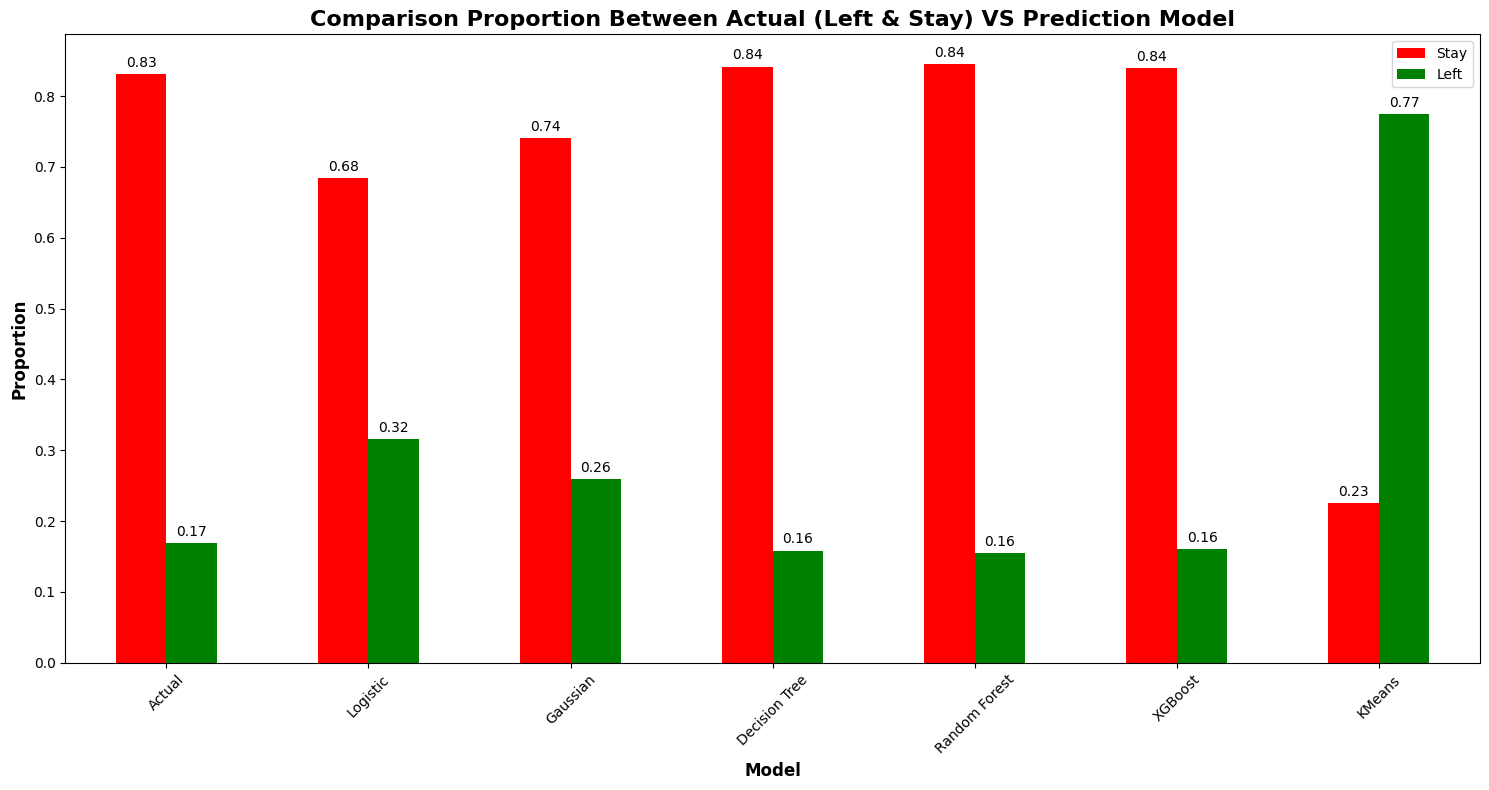

In [144]:
ax9 = compare_df.plot(kind = 'bar',
                figsize= (15,8),
                color = ['red', 'green'])

plt.title('Comparison Proportion Between Actual (Left & Stay) VS Prediction Model', fontsize = 16, fontweight = 'bold')
plt.xlabel('Model', fontsize = 12, fontweight = 'bold')
plt.ylabel('Proportion', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper right')

for container in ax9.containers:
    ax9.bar_label(container, fmt = '%.2f', label_type= 'edge', padding = 3)

plt.tight_layout()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The results indicate that tree-based models such as Decision Tree, Random Forest, and XGBoost provided predictions that closely matched the actual distribution of employees who stayed and those who left, with each showing 84% classified as "Stay" and 16% as "Left". Logistic Regression and Gaussian Naive Bayes tended to overestimate the number of employees who left, predicting 32% and 26% respectively. On the other hand, KMeans showed a significant deviation from the actual trend by predicting 77% of employees would leave, suggesting that this clustering approach is not well-suited for the classification task in this context.

### Conclusion, Recommendations, Next Steps

 ● Customer Prediction: Tree-based models are the preferred choice for accurately 
predicting customer behavior.

 ● Workload Balance: Maintaining a balanced workload (3-4 projects per employee) is 
crucial for performance and retention.

 ● Growth & Recognition: Enhancing career progression and recognition programs, 
especially for long-tenured employees, is vital for engagement.

 ● Clear Policies: Providing clear guidance on work hours, overtime, leave, and rewards 
fosters trust and clarity.

 ● Open Communication: Promoting regular team and company-wide discussions helps 
address work culture issues and boost morale.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.